<a href="https://colab.research.google.com/github/aluminiumskullz2000/MA0218/blob/main/Complete_Data_Cleaning_%26_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction on Survival Rate and Aircraft Damage of Aviation Accidents
## MA0218 Mini Project
### AY2022/23 MA9 Group 5

### Essential Library
Let's import the necessary library

In [ ]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set                                  # this is to set the default Seaborn style for graphics

<function seaborn.rcmod.set(*args, **kwargs)>

To ignore unnecessary warning , we will be importing the following library. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### A glace at dataset
We import the dataset which is in csv format with `read_csv` from the pandas library.

In [ ]:
avi_accident = pd.read_csv("AviationData.csv")
avi_accident

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/7/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/9/1996
2,20061025X01555,Accident,NYC07LA005,30/8/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/2/2007
3,20001218X45448,Accident,LAX96LA321,19/6/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/9/2000
4,20041105X01764,Accident,CHI79FA064,2/8/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/4/1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,2.02112E+13,Accident,GAA22WA054,21/12/2021,"Auxerre, OF",United States,475047N,0032948W,NaN,NaN,...,Unknown,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87278,2.02112E+13,Accident,WPR22LA069,22/12/2021,"Auburn, CA",United States,NaN,NaN,NaN,NaN,...,Positioning,"Fox Two, LLC",0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN
87279,2.02112E+13,Accident,CEN22FA082,26/12/2021,"Hardy, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
87280,2.02112E+13,Accident,ERA22LA097,29/12/2021,"Marathon, FL",United States,NaN,NaN,NaN,NaN,...,NaN,ExecAir,0.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN


Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

> **Event.Id** : Unique Identification for Each Event.\
> **Investigation.Type** : Type of Event. \
> **Accident.Number** : NTSB Number. \
> **Event.Date** : The date of the event. Dates are be entered in the format: MM/DD/YYYY \
> **Location** : The city or place location closest to the site of the event. \
> **Country** :	The country in which the event took place.\
> **Latitude** : Event Location Latitude. \
> **Longitude** : Event Location Longitude. \
> **Airport.Code** : Airport code if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Airport.Name** : Airport name if the event took place within 3 miles of an airport, or the involved aircraft was taking off from, or on approach to, an airport. \
> **Injury.Severity** : Indicate the highest level of injury among all injuries sustained as a result of the event. \
> **Aircraft.damage** : Indicate the severity of damage to the accident aircraft. For the purposes of this variable, aircraft damage categories are defined in 49 CFR 830.2.\
> **Aircraft.Category** :The category of the involved aircraft. In this case, the definition of aircraft category is the same as that used with respect to the certification, ratings, privileges, and limitations of airmen. Also note that there is some overlap of category and class in the available choices.\
> **Registration.Number** : ll registration (tail) number of the involved aircraft, including the International Civil Aviation Organization (ICAO) country prefix. Note: the prefix for US registered aircraft is "N." \
> **Make** : Name of the manufacturer of the involved aircraft. \
> **Model** : Aircraft Model. \
> **Amateur.Built** : Aircraft is a homebuilt (Y/N). \
> **Number.of.Engines** : The total number of engines on the accident aircraft. \
> **Engine.Type** :	Type of engine(s) on the involved aircraft. \
> **FAR.Description** :	The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident. \
> **Schedule** : Indicates whether an air carrier operation was scheduled or not. \
> **Purpose.of.flight** :Type of Flying (Per_Bus / Primary). \
> **Air.carrier** : Operator Name & Operator Is Doing Business As. \
> **Total.Fatal.Injuries** : Injury Total Fatal. \
> **Total.Serious.Injuries** : Injury Total Serious. \
> **Total.Minor.Injuries** : Injury Total Minor. \
> **Total.Uninjured** : Non-Injury Total. \
> **Weather.Condition** : Basic weather conditions. \
> **Broad.phase.of.flight** : All occurrences include information about the phase of flight in which the occurrence took place. Phase of flight refers to the point in the aircraft operation profile in which the event occurred. \
> **Report.Status** : The furthest level to which a report has been completed.\
> **Publication.Date** : The date on which the previous column was published to the web. \

Let's have an overview of the dataset, i.e. the `type` and `shape` of the data.

In [ ]:
print("Data type:\t", type(avi_accident))
print("Data dimension:\t", avi_accident.shape)

Data type:	 <class 'pandas.core.frame.DataFrame'>
Data dimension:	 (87282, 31)


Next, we will check the data type of each column by using `info`.

In [ ]:
avi_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

## Data Preperation and Data Cleaning

We will now prepare and clean up our dataset.

First, we will use `describe` to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the dataset. 

Note that this will only represents the overview for the column of the **numerical data**.

In [ ]:
avi_accident.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


We will only extract the data which are useful for analysis, which then comprised of 18 out of 31 columns in total and have a look at the data type of each column with `info`.

In [ ]:
avi_acc = avi_accident[["Accident.Number", "Investigation.Type", "Event.Date", "Location", 
                       "Country",  "Injury.Severity" , "Aircraft.damage", "Make", 
                      "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight",  
                      "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries",
                      "Total.Uninjured", "Weather.Condition","Broad.phase.of.flight" 
                      ]]
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Location                87230 non-null  object 
 4   Country                 87056 non-null  object 
 5   Injury.Severity         86399 non-null  object 
 6   Aircraft.damage         84272 non-null  object 
 7   Make                    87219 non-null  object 
 8   Amateur.Built           87180 non-null  object 
 9   Number.of.Engines       81533 non-null  float64
 10  Engine.Type             81391 non-null  object 
 11  Purpose.of.flight       81493 non-null  object 
 12  Total.Fatal.Injuries    75881 non-null  float64
 13  Total.Serious.Injuries  74772 non-null  float64
 14  Total.Minor.Injuries    75349 non-null

As there are 87282 rows and there are 87282 unique Accident Number, we can then ensure that all the datapoints are unique and no duplicated data in this dataset.

In [ ]:
print("Total number of rows in dataset:\t", len(avi_acc))
print("Total number of unique Event ID:\t", len(avi_acc["Accident.Number"].unique()))

Total number of rows in dataset:	 87282
Total number of unique Event ID:	 87282


Now, we will check for NULL inputs and deal with them accordingly. 

In [ ]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines          5749
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

First, we want to clear the null values of `Total.Fatal.Injuries`, `Ttoal.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`. We wil first deal with the **numerical variables**, so let's know more about the measure of central tendancy. 

**NOTE:** We consider `Number.of.Engines` as discrete data which is typically represented as categorical data.  

### Dealing with Null Values

**Impute with mean, median or mode value**
- **Impute with mean:** If the data is symmetrically distributed, one can make use of mean for replacing missing value. 
- **Impute with median:** If the data is skewed (either positively or negatively) or if the data consists of outliers, one can make use of median.
- **Impute with mode:** If the data is skewed (either positively or negatively), one can make use of mean for replacing missing value. 

We will first start off by using `describe` function to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the numerical variable dataset.

In [ ]:
avi_acc[["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", 
         "Number.of.Engines"]].describe()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Number.of.Engines
count,75881.000000,74772.000000,75349.000000,81370.000000,81533.000000
mean,0.652772,0.280921,0.360814,5.311847,1.147131
std,5.521338,1.557476,2.257721,27.899156,0.447085
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000,1.000000
max,349.000000,161.000000,380.000000,699.000000,8.000000


To have a clearer visualisation of the dataset distribution, we will use **Box Plot**, follow by **Histogram & KDE Plot**, lastly with **Violin PLot**.

We will first start with the **Box Plot** of `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries` and `Total.Uninjured`.

Text(0.5, 1.0, 'Total Uninjured')

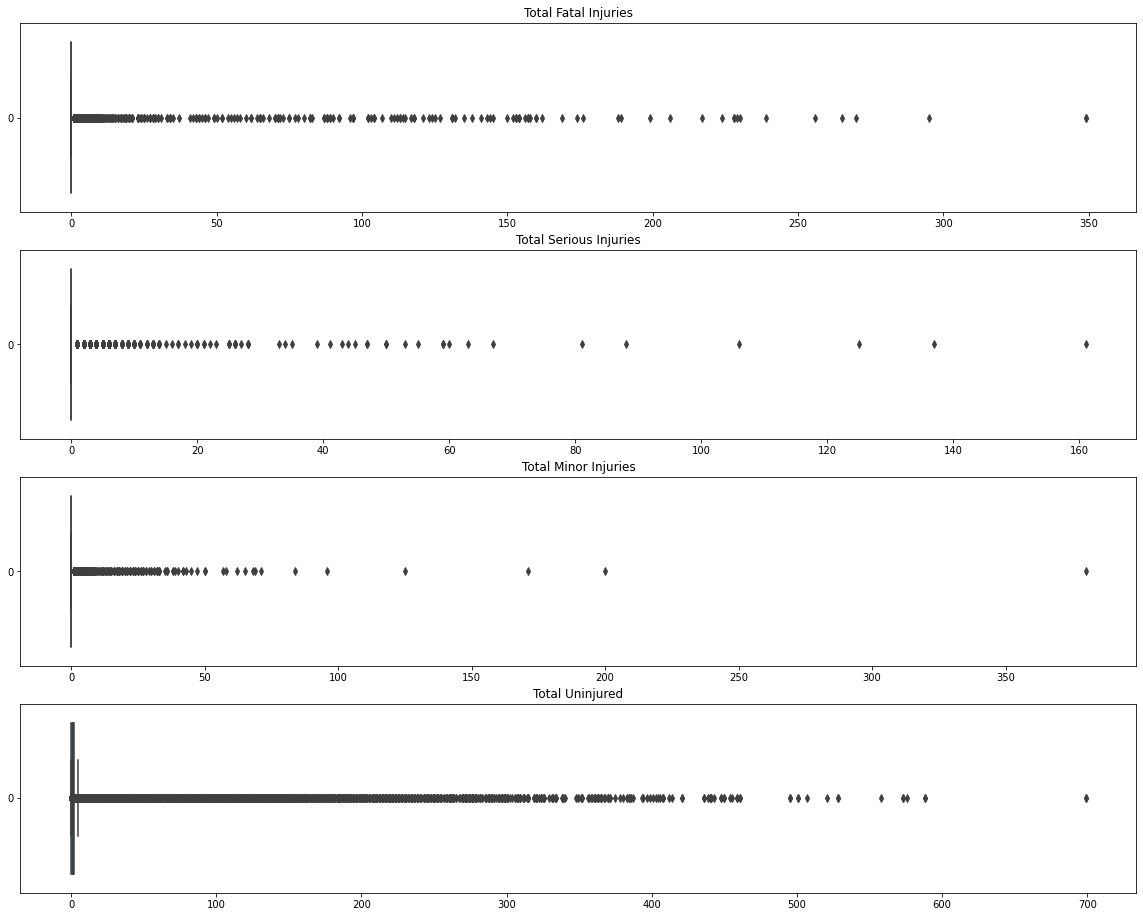

In [ ]:
f, axes = plt.subplots(4,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")
sb.boxplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[3]).set_title("Total Uninjured")

**Skewness**

Skewness is a measure of symmetry, which in turn tells us more about the distribution of the data.
- If the skewness is between **-0.5** and **0.5**, the data is fairly symmetrical.
- If the skewness is between **-1** and **-0.5** or between **0.5** and 1, the data is moderately skewed.
- If the skewness is less than **-1** or greater than **1**, the data is highly skewed.

From the skewness of each variable given below, 

In [ ]:
Numdata = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Number.of.Engines"]
for i in Numdata:
    print("SKewness", i, "\t:", avi_acc[i].skew())

SKewness Total.Fatal.Injuries 	: 32.89339797950946
SKewness Total.Serious.Injuries 	: 49.159571419457386
SKewness Total.Minor.Injuries 	: 86.53335193063873
SKewness Total.Uninjured 	: 9.141805758957995
SKewness Number.of.Engines 	: 2.5727437956018897


Now, we will have a look at the **mean**, **median** and **mode** of each of the data. This will gives a summary of the centre point of the dataset.

In [ ]:
for i in Numdata:
    print(i, "Mean:", round(avi_acc[i].mean(),2), "\t\tMedian:", avi_acc[i].median(), "\t\tMode:", avi_acc[i].mode(), "\n")

Total.Fatal.Injuries Mean: 0.65 		Median: 0.0 		Mode: 0    0.0
dtype: float64 

Total.Serious.Injuries Mean: 0.28 		Median: 0.0 		Mode: 0    0.0
dtype: float64 

Total.Minor.Injuries Mean: 0.36 		Median: 0.0 		Mode: 0    0.0
dtype: float64 

Total.Uninjured Mean: 5.31 		Median: 1.0 		Mode: 0    0.0
dtype: float64 

Number.of.Engines Mean: 1.15 		Median: 1.0 		Mode: 0    1.0
dtype: float64 



By looking at the skewness of the data, we can conclude that all `Total.Fatal.Injuries`, `Total.Serious.Injuries`, `Total.Minor.Injuries`, `Total.Uninjured` and `Number.of.Engines` are positively skewed. 

Hence, we decided to use **median** to replace all the null values without changing the distribution of the data. This decision is supported by the fact that the values of median and mean are much similar as compared to mode for this highly skewed data.

In [ ]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(missing_values = np.NaN, strategy = 'median')
avi_acc['Total.Fatal.Injuries']= imputer_median.fit_transform(avi_acc["Total.Fatal.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Serious.Injuries']= imputer_median.fit_transform(avi_acc["Total.Serious.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Minor.Injuries']= imputer_median.fit_transform(avi_acc["Total.Minor.Injuries"].values.reshape(-1,1))[:,0]
avi_acc['Total.Uninjured']= imputer_median.fit_transform(avi_acc["Total.Uninjured"].values.reshape(-1,1))[:,0]
avi_acc['Number.of.Engines']= imputer_median.fit_transform(avi_acc["Number.of.Engines"].values.reshape(-1,1))[:,0]

Now,we will count the number of null data form each column of the cleaned data. Notice that we still have null values in the categorical variables, i.e. `Location`, `Country`, `Injury.Severity`, `Aircraft.damage`, `Make`, `Amateur.Built`, `Number.of.Engines`, `Engine.Type`, `Purpose.of.flight`, `Weather.Condition` and `Broad.phase.of.flight`.

In [ ]:
avi_acc.isnull().sum()

Accident.Number               0
Investigation.Type            0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity             883
Aircraft.damage            3010
Make                         63
Amateur.Built               102
Number.of.Engines             0
Engine.Type                5891
Purpose.of.flight          5789
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          3978
Broad.phase.of.flight     25558
dtype: int64

Let's have a look at the distribution of the numerical variables after replacing with **median** by using a **boxplot** to visualise. Notice that the distribution remains the same.

Text(0.5, 1.0, 'Total Uninjured')

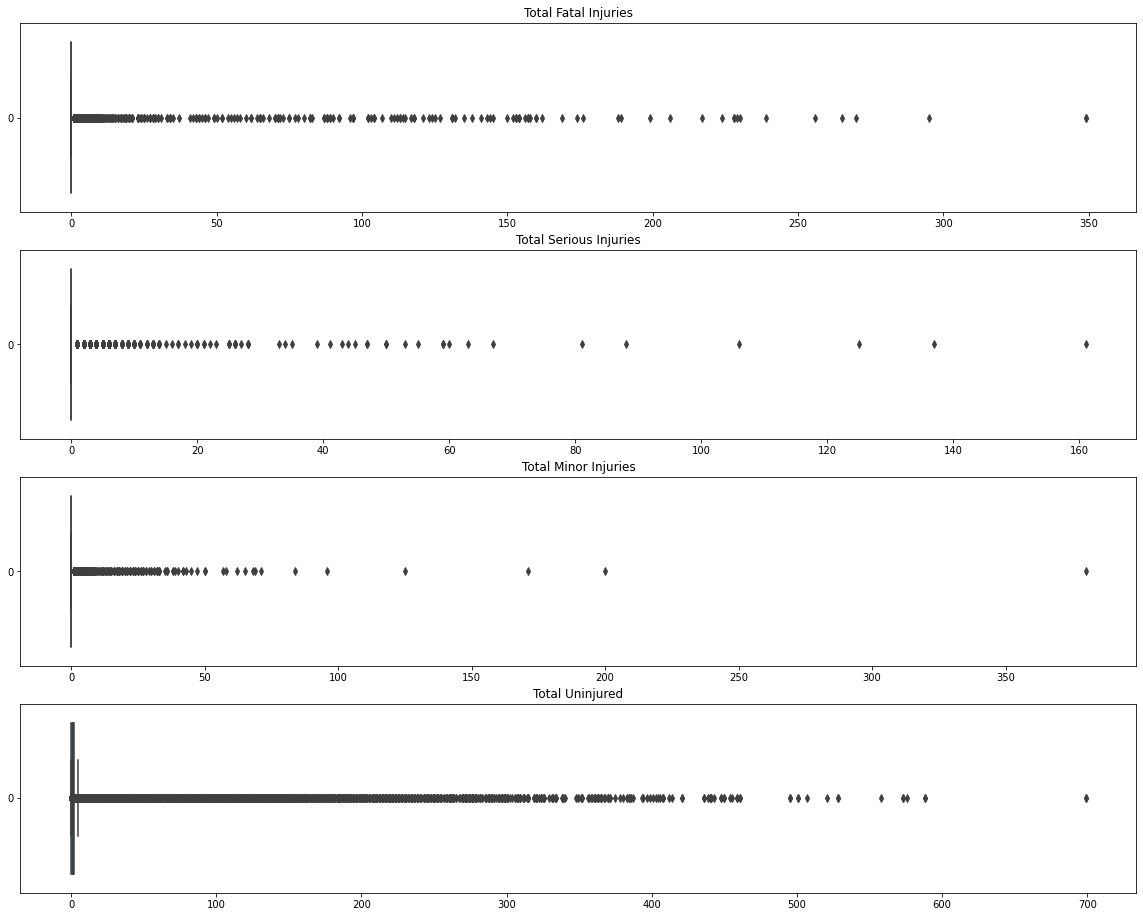

In [ ]:
f, axes = plt.subplots(4,1, figsize = (20,16))

sb.boxplot(data = avi_acc["Total.Fatal.Injuries"], orient = "h", ax = axes[0]).set_title("Total Fatal Injuries")
sb.boxplot(data = avi_acc["Total.Serious.Injuries"], orient = "h", ax = axes[1]).set_title("Total Serious Injuries")
sb.boxplot(data = avi_acc["Total.Minor.Injuries"], orient = "h", ax = axes[2]).set_title("Total Minor Injuries")
sb.boxplot(data = avi_acc["Total.Uninjured"], orient = "h", ax = axes[3]).set_title("Total Uninjured")
sb.boxplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[3]).set_title("Total Uninjured")

Now, we will deal with the null values which are non-numerical by filling **Unknown**.

As for `Weather.Condition`, we will replace the null values as **UNK**, which represents unknown in this column. 
As for `Injury.Severity`, we will replace the null value as **Unavailable**.

In [ ]:
catdata = ["Location", "Country" , "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", "Broad.phase.of.flight",
          "Aircraft.damage"]
for j in catdata:
    avi_acc[j].fillna(value = "Unknown", inplace = True)

avi_acc["Weather.Condition"].fillna(value = "UNK", inplace = True)
avi_acc["Injury.Severity"].fillna(value = "Unavailable", inplace = True)


Now, our data should not consists of any **NULL DATA** anymore.

In [ ]:
avi_acc.isnull().sum()

Accident.Number           0
Investigation.Type        0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Make                      0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

Before proceding to the **Exploratory Data Analysis & Visualisation**, we will change the data types of each column.

Notice that the data type for each column wil be changed by now. We will check the data type of each column using `info` function.

In [ ]:
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Accident.Number         87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Event.Date              87282 non-null  object 
 3   Location                87282 non-null  object 
 4   Country                 87282 non-null  object 
 5   Injury.Severity         87282 non-null  object 
 6   Aircraft.damage         87282 non-null  object 
 7   Make                    87282 non-null  object 
 8   Amateur.Built           87282 non-null  object 
 9   Number.of.Engines       87282 non-null  float64
 10  Engine.Type             87282 non-null  object 
 11  Purpose.of.flight       87282 non-null  object 
 12  Total.Fatal.Injuries    87282 non-null  float64
 13  Total.Serious.Injuries  87282 non-null  float64
 14  Total.Minor.Injuries    87282 non-null

We will now look into each of the variables and do some suitable data cleaning before proceeding to **Exploratory Data Analysis and Visualisation**

###Data Cleaning (variables)

#### Event Date 

We will now look into `Event.Date`. As we can see all of the data is in **dd/mm/yyyy** format. We decided to only extract data based on **years of occurance of event** to be further analysed during Exploratory Data Analysis and Visualisation later.

In [ ]:
year_list = []
for i  in avi_acc["Event.Date"]:
    date_list = i.split("/")
    year = int(date_list[-1])
    year_list.append(year)
avi_acc["Event.Date"] = pd.DataFrame(year_list)
avi_acc.rename(columns={'Event.Date' : 'Event Year'}, inplace = True)


After regrouping the event date by years of event, we have 47 unique values. The number of data for each unique year event year is shown below.

In [ ]:
print("Number of unique Event Year:\t", len(avi_acc["Event Year"].unique()))
avi_acc["Event Year"].value_counts()

Number of unique Event Year:	 47


1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2015    1582
2013    1561
2021    1544
2014    1535
2020    1392
1979       2
1948       1
1962       1
1981       1
1977       1
1974       1
2022       1
Name: Event Year, dtype: int64

#### Injury and Severity

We will now look into `Injury.Severity`. As we can see there are 107 types of data in **Injury and Severity**.

In [ ]:
print("Number of data in Injury.Severity:\t", len(avi_acc["Injury.Severity"].unique()))

Number of data in Injury.Severity:	 107


We will group all the **fatal** data together despite of the different number of deaths indicated behind. This will help us to reduce large set of unique categorical data under `Injury.Severity`. 

In [ ]:
injury_list = []
for i in avi_acc["Injury.Severity"]:
    if i[0:5].lower() == "fatal":
        injury_list.append("Fatal")
    elif i == "Incident":
        injury_list.append("Incident")
    elif i == "Unavailable":
        injury_list.append("Unavailable")
    elif i == "Non-Fatal":
        injury_list.append("Non-Fatal") 
        
injury_df = pd.DataFrame(data = injury_list, columns = ["Injury"])
avi_acc["Injury.Severity"] = injury_df["Injury"]

After regrouping the **Injury.Severity**, we have 4 unique values. The number of each unique Injury and Severity is indicated below.

In [ ]:
print("Number of unique Injury.Severity:\t", len(avi_acc["Injury.Severity"].unique()))
avi_acc["Injury.Severity"].value_counts()

Number of unique Injury.Severity:	 4


Non-Fatal      66561
Fatal          17523
Incident        2219
Unavailable      979
Name: Injury.Severity, dtype: int64

#### Weather condition 

We will now look into `Weather.Condition`. We can notice that there are n types of Weather condition in this datatype.

Notice that there are **Unk** and **UNK** which are both representing the similar Weather Condition, which is **Unknown**. We will rename both data as the same category.

We will also rename each of the weather condition to its full name for a better understanding. We will rename them according to the list below.  

| Previous | Current |
| :-----------| :---------- |
| UNK/Unk | Unknown |
| VMC | Visual Meteorological Conditions |
| IMC | Instrument Meterological Conditions |

where:

**VMC (Visual Meteorological Conditions)**: Visibility more than 5km, cloudbase 1500 ft. Pilots can sufficiently and safely maintain visuals of all other aircraft and the terrain around them.

**IMC (Instrument Meterological Conditions)**: Any conditions worse than VMC, pilots need to rely on instruments.

**Unk/UNK (Unknown)**: Weather condition unknown.

In [ ]:
weather_list = []

for i in avi_acc["Weather.Condition"]:
    if i.upper() == "UNK":
        weather_list.append("Unknown")
    elif i == "VMC":
         weather_list.append("Visual Meteorological Conditions")
    else:
         weather_list.append("Instrument Meterological Conditions")
weather_df = pd.DataFrame(data = weather_list, columns = ["Weather"])
avi_acc["Weather.Condition"] = weather_df["Weather"]

After regrouping the **Weather.Condition**, we have 3 unique values. The number of each unique Weather.Condition is indicated below.

In [ ]:
print("Number of unique Weather.Condition:\t", len(avi_acc["Weather.Condition"].unique()))
avi_acc["Weather.Condition"].value_counts()

Number of unique Weather.Condition:	 3


Visual Meteorological Conditions       76251
Instrument Meterological Conditions     5944
Unknown                                 5087
Name: Weather.Condition, dtype: int64

#### Broad Phase of Flight 

We will now look into `Broad.phase.of.flight`. We can see that there are 12 types of Broad Phase of Flight. 

In [ ]:
print("Types of Broad Phase of Flight:\t", len(avi_acc["Broad.phase.of.flight"].unique()))

Types of Broad Phase of Flight:	 12


We will clasify the broad phase of flight according to the table below.

| Previous | Current |
| :-----------| :---------- |
| Taxi/Standing | 1 |
| Takeoff/Landing | 2 |
| Climb/Descent/Approach/Go-around | 3 |
| Cruise/Maneuvering | 4 |
| Others | 0 |


In [ ]:
broad_phase = []
for i in avi_acc["Broad.phase.of.flight"]:
    if i in ["Taxi","Standing"]:
        broad_phase.append(1)
    elif i in ["Takeoff","Landing"]:
        broad_phase.append(2)
    elif i in ["Climb","Descent","Approach","Go-around"]:
        broad_phase.append(3)
    elif i in ["Cruise","Maneuvering"]:
        broad_phase.append(4)
    else:
        broad_phase.append(0)
Broad_phase_of_flight_df = pd.DataFrame(data=broad_phase, columns = ["Broad phase of flight"])
avi_acc["Broad.phase.of.flight"] = Broad_phase_of_flight_df["Broad phase of flight"]

After regrouping the **Broad.phase.of.flight**, we have 5 unique values. The number of each unique Weather.Condition is indicated below.

In [ ]:
print("Number of unique Broad.phase.of.flight:\t", len(avi_acc["Broad.phase.of.flight"].unique()))
avi_acc["Broad.phase.of.flight"].value_counts()

Number of unique Broad.phase.of.flight:	 5


2    27921
0    26225
4    18413
3    11820
1     2903
Name: Broad.phase.of.flight, dtype: int64

#### Aircraft damage 

We will now look into `Aircraft.Damage`. We can see that there are 4 types of Aircraft Damage. 

In [ ]:
print("Number of unique values of Aircraft Damage:\t", len(avi_acc["Aircraft.damage"].unique()))

Number of unique values of Aircraft Damage:	 4


To better illustrate the level of damage, we decided to classify the level of damage by using level of numbers.
We will classify the level of damage according to the list below.

| Previous | Current |
| :-----------| :---------- |
| Minor | 1 |
| Substantial | 2 |
| Destroyed | 3 |
| Unknown | 0 |

Where 1 being the least damage and 3 beign the greatest damage to the aircraft.

**Note**: we use level 0 to classify unknown data.

In [ ]:
damage = []
for i in avi_acc["Aircraft.damage"]:
    if i in ["Minor"]:
        damage.append(1)
    elif i in ["Substantial"]:
        damage.append(2)
    elif i in ["Destroyed"]:
        damage.append(3)
    else:
        damage.append(0)
damage_df = pd.DataFrame(data=damage, columns = ["damage"])
avi_acc["Aircraft.damage"] = damage_df["damage"]

In [ ]:
print("Number of unique Aircraft.damage:\t", len(avi_acc["Aircraft.damage"].unique()))
avi_acc["Aircraft.damage"].value_counts()

Number of unique Aircraft.damage:	 4


2    62975
3    18465
0     3078
1     2764
Name: Aircraft.damage, dtype: int64

#### Fatal Injury Rate

We define a new variable of our concern known as **Fatal Injury Rate**. The **Fatal Injury Rate** is processed by using the formula stated below.

$\frac{Total.Fatal.Injuries} {Total.Fatal.Injuries+Total.Serious.Injuries+Total.Minor.Injuries+Total.Uninjured}*100\%$

In [ ]:
rate_list = []
count = 0
fatal_list = avi_acc["Total.Fatal.Injuries"].tolist()
serious_list = avi_acc["Total.Serious.Injuries"].tolist()
minor_list = avi_acc["Total.Minor.Injuries"].tolist()
no_list = avi_acc["Total.Uninjured"].tolist()

for i in range(0,len(avi_acc)):
    try:
        rate = round(((fatal_list[i])/(fatal_list[i]+serious_list[i]+minor_list[i]+no_list[i])*100),2)
    except: #fatal_list[i] = serious_list[i] = minor_list[i] = no_list[i] = 0
        rate = 0
    rate_list.append(rate)
rate_df = pd.DataFrame(rate_list)
avi_acc["Fatal.rate"] = rate_df

#### Number of plane

Let's us now look at the variable `Accident.Number`.
If there is presence of character **A or B or C** at the back of the serial number, it shows that this incident involves more than one plane.

In [ ]:
sp2df = pd.read_csv("AviationData.csv")
list1 = []
list2 = []
final_list = []

for i in sp2df["Accident.Number"]:
    if i[-1] in ["A","B","C"]:
        list1.append(i)
list1.sort()

for k in sp2df["Accident.Number"]:
    if k[-1] in "C":
        list2.append(k[0:-1])
        
for j in sp2df["Accident.Number"]:
    if j not in list1:
        final_list.append(1)
    elif j[0:-1] in list2:
        final_list.append(3)
    else:
        final_list.append(2)
        
avi_acc["Number of plane involved"] = final_list

Notice that the number of plane involved in aviation accident is now extracted out from the `accident number` dataset.

In [ ]:
avi_acc["Number of plane involved"].value_counts()

1    85459
2     1817
3        6
Name: Number of plane involved, dtype: int64

#### Make 

Notice that some of the data are seperated into two different groups despite being the same **Make** category, for example Boeing and BOEING, Piper and PIPER. Hence, some of the data cleaning is required to clean up the data for better Exploratory Data Analysis and Visualisation. 

In [ ]:
print("Total number of unique MAKE data:\t", len(avi_acc["Make"].unique()))
avi_acc["Make"].value_counts()

Total number of unique MAKE data:	 8045


Cessna                   22227
Piper                    12029
CESSNA                    4549
Beech                     4329
PIPER                     2618
                         ...  
Harwell/gardner              1
Galaxy Balloons, Inc.        1
Moseler                      1
University Of Alabama        1
CAMERON BALLOONS U S         1
Name: Make, Length: 8045, dtype: int64

To make sure there is no error in categorical data, we will rename all the `Make` data to become upper case and replace the original data.  

In [ ]:
make_list = []
for i in avi_acc["Make"]:
    make_list.append(i.upper())
avi_acc["Make"] = make_list

Notice that after cleaning the number of unique MAKE data reduce from 8406 to 7409.

In [ ]:
print("Total number of unique MAKE data after cleaning:\t", len(avi_acc["Make"].unique()))
avi_acc["Make"].value_counts()

Total number of unique MAKE data after cleaning:	 7408


CESSNA                  26776
PIPER                   14647
BEECH                    5305
BELL                     2672
BOEING                   2648
                        ...  
ARNET PEREYRA AERO          1
WILLIAM JOHN SCHULZ         1
WILLIAM JAY KINNEY          1
HAERING AVID FLYER          1
CAMERON BALLOONS U S        1
Name: Make, Length: 7408, dtype: int64

#### Amateur Built

Notice that for **Amateur Built**, the categorical data are divided into **Yes**, **Y**, **No**, **N** and **NotDefined**. The categorical variables seem to be reduntant of each other. Hence, we will work on grouping the data of the same type together.

| Previous | Current |
| :-----------| :---------- |
| Yes/Y | Yes |
| No/N | No |
| Unknown | Unknown |

In [ ]:
print("Number of unique data of Amateur Built:\t", len(avi_acc["Amateur.Built"].unique()))
avi_acc["Amateur.Built"].value_counts()

Number of unique data of Amateur Built:	 5


No         58165
N          20661
Yes         5646
Y           2708
Unknown      102
Name: Amateur.Built, dtype: int64

In [ ]:
ama_list = []
for i in avi_acc["Amateur.Built"]:
    if i in ["No", "N"]:
        ama_list.append("No")
    elif i in ["Yes", "Y"]:
        ama_list.append("Yes")
    else:
        ama_list.append("Unknown")
avi_acc["Amateur.Built"] = ama_list

Notice that the unique data of Amateur Built has reduced to **3 types** from **5 types**.   

In [ ]:
print("Number of unique data of Amateur Built:\t", len(avi_acc["Amateur.Built"].unique()))
avi_acc["Amateur.Built"].value_counts()

Number of unique data of Amateur Built:	 3


No         78826
Yes         8354
Unknown      102
Name: Amateur.Built, dtype: int64

### Change of data types

We will now manipulate the data types to fascilitate **Exploratory Data Analysis & Visualisation** and reduce the memory for a better coding runtime. 

In [ ]:
def convert_category(data, *args):
    for k in args:
        data[k] = data[k].astype("category")

def convert_float32(data, *args):
    for k in args:
        data[k] = data[k].astype("float32")
        
convert_category(avi_acc, ["Accident.Number", "Investigation.Type", "Location", "Country", "Injury.Severity", 
                         "Aircraft.damage",  "Make", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                        "Weather.Condition", "Broad.phase.of.flight", "Event Year"])
convert_float32(avi_acc, ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured",
                          "Fatal.rate", "Number of plane involved", "Number.of.Engines"])

In [ ]:
avi_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Accident.Number           87282 non-null  category
 1   Investigation.Type        87282 non-null  category
 2   Event Year                87282 non-null  category
 3   Location                  87282 non-null  category
 4   Country                   87282 non-null  category
 5   Injury.Severity           87282 non-null  category
 6   Aircraft.damage           87282 non-null  category
 7   Make                      87282 non-null  category
 8   Amateur.Built             87282 non-null  category
 9   Number.of.Engines         87282 non-null  float32 
 10  Engine.Type               87282 non-null  category
 11  Purpose.of.flight         87282 non-null  category
 12  Total.Fatal.Injuries      87282 non-null  float32 
 13  Total.Serious.Injuries    87282 non-null  floa

In [ ]:
avi_acc.isnull().sum()

Accident.Number             0
Investigation.Type          0
Event Year                  0
Location                    0
Country                     0
Injury.Severity             0
Aircraft.damage             0
Make                        0
Amateur.Built               0
Number.of.Engines           0
Engine.Type                 0
Purpose.of.flight           0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition           0
Broad.phase.of.flight       0
Fatal.rate                  0
Number of plane involved    0
dtype: int64

***

## Exploratory Data Analysis & Visualisation

We are now ready to work on **Exploratory Data Analysis and Visualisation.**

In this stage, we will work on removing the abnormalies of the data for a better and more accurate machine learning at the later stage. 

In [ ]:
avi_acc1 = avi_acc.copy()
avi_acc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Accident.Number           87282 non-null  category
 1   Investigation.Type        87282 non-null  category
 2   Event Year                87282 non-null  category
 3   Location                  87282 non-null  category
 4   Country                   87282 non-null  category
 5   Injury.Severity           87282 non-null  category
 6   Aircraft.damage           87282 non-null  category
 7   Make                      87282 non-null  category
 8   Amateur.Built             87282 non-null  category
 9   Number.of.Engines         87282 non-null  float32 
 10  Engine.Type               87282 non-null  category
 11  Purpose.of.flight         87282 non-null  category
 12  Total.Fatal.Injuries      87282 non-null  float32 
 13  Total.Serious.Injuries    87282 non-null  floa

### Uni-Variate Statistics 

In our project, we will mainly focus on two responding variables, namely `Fatal.rate` and `Aircraft.damage`.

#### Aircraft Damage

We will have an overview on the distribution of the **Aircraft Damage** by looking at the categorical plot of the data. 

Notice that aircraft damage level 2 to be the highest, follow by level 3, level 0 and level 1 being the lowest.

<Figure size 864x576 with 0 Axes>

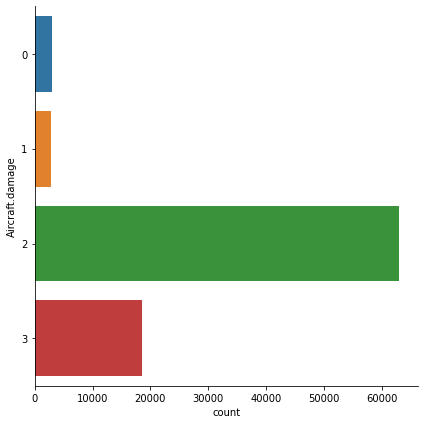

In [ ]:
f = plt.figure(figsize = (12,8))
sb.catplot(y = "Aircraft.damage", data = avi_acc, kind = "count", height = 6)

#### Fatal Rate

We will have an overview on the distribution of the **Fatal Rate** by looking at the box plot, histogram with Kernel Density Estimation plot and violin plot of the data. 

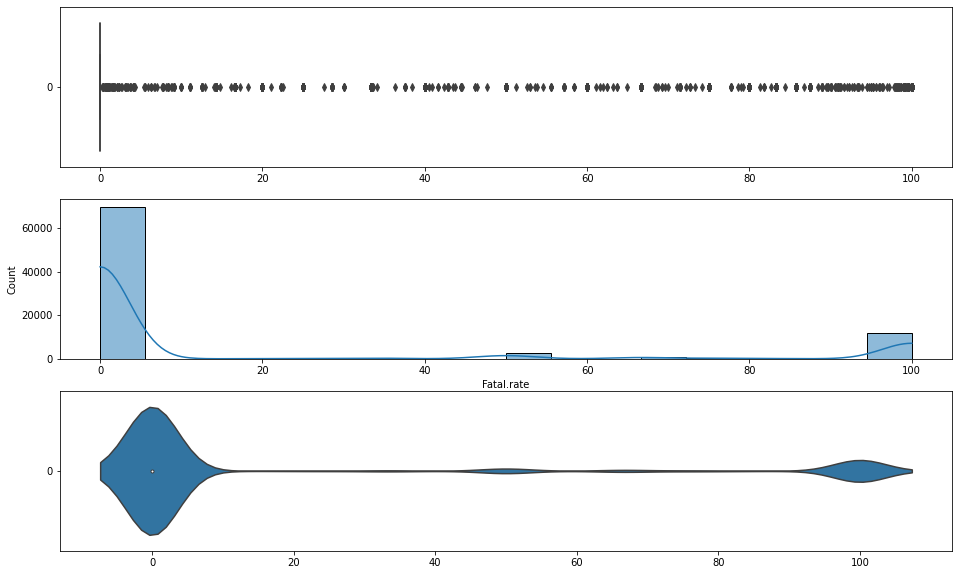

In [ ]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc["Fatal.rate"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc["Fatal.rate"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc["Fatal.rate"], orient = "h", ax = axes[2])

#### Numerical Predictors (Overview)

Predictors (categorical) : `Number of plane involved`, `Number.of.Engines`

In [ ]:
numdf = avi_acc[["Number of plane involved", "Number.of.Engines"]]
numdf.head()

,Number of plane involved,Number.of.Engines
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


We will be using `describe` function to have an overview of the **count**, **mean**, **standard deviation** (denoted by std), **minimum value** (denoted by min) , **first quartile** (denoted by 25%) , **median** (denoted by 50%) , **third quartile** (denoted by 75%) and **maximum value** (denoted by max) of the numerical variable dataset.

In [ ]:
numdf.describe()

,Number of plane involved,Number.of.Engines
count,87282.000000,87282.000000
mean,1.020955,1.137440
std,0.143714,0.433648
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,3.000000,8.000000


##### Number of plane involved

We will look at the overview of the distribution of **Number of plane involved**. We will then look at the **boxplot**, **Histogram and Kernel Density Estimate plot** and **violin plot**.

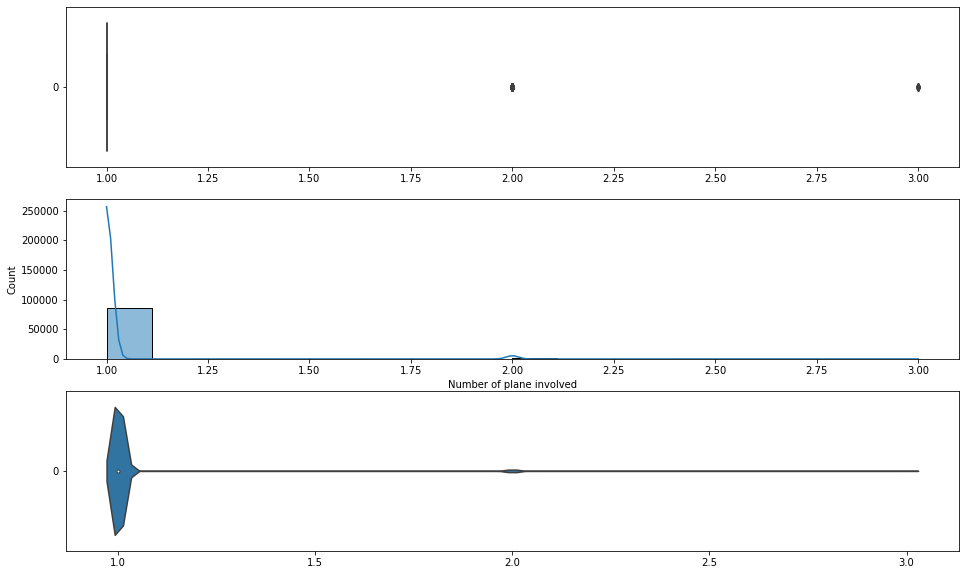

In [ ]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc["Number of plane involved"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc["Number of plane involved"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc["Number of plane involved"], orient = "h", ax = axes[2])

##### Number of engines

We will look at the overview of the distribution of **Number of engines**. We will then look at the **boxplot**, **Histogram and Kernel Density Estimate plot** and **violin plot**.

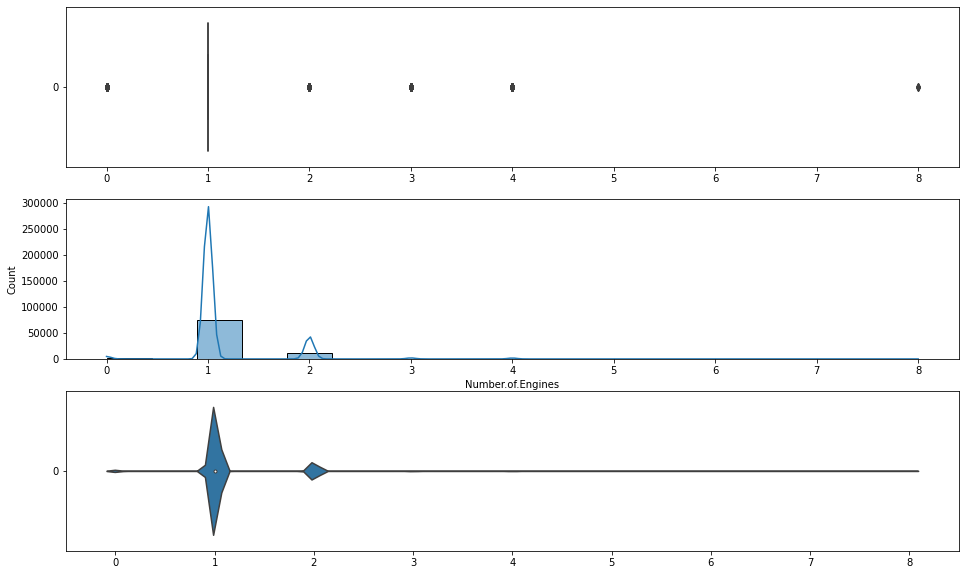

In [ ]:
f, axes = plt.subplots(3,1, figsize=(16,10))
sb.boxplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[0])
sb.histplot(data = avi_acc["Number.of.Engines"], kde = True, ax = axes[1])
sb.violinplot(data = avi_acc["Number.of.Engines"], orient = "h", ax = axes[2])

#### Categorical Predictors (Overview)

Predictors (categorical) : `Accident.Number`, `Investigation.Type`, `Event.Date`, `Location`, `Country`, `Injury.Severity`, `Make`, `Amateur.Built`, `Number.of.Engines`, `Engine.Type`, `Purpose.of.flight`, `Broad.phase.of.flight`.  

In [ ]:
catDF = pd.DataFrame(avi_acc1[["Investigation.Type", "Event Year", "Location", "Country", 
                  "Injury.Severity", "Make", "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight", 
                  "Broad.phase.of.flight"]])
catDF

,Investigation.Type,Event Year,Location,Country,Injury.Severity,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Broad.phase.of.flight
0,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,STINSON,No,1.0,Reciprocating,Personal,4
1,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,PIPER,No,1.0,Reciprocating,Personal,0
2,Accident,1974,"Saltville, VA",United States,Fatal,CESSNA,No,1.0,Reciprocating,Personal,4
3,Accident,1977,"EUREKA, CA",United States,Fatal,ROCKWELL,No,1.0,Reciprocating,Personal,4
4,Accident,1979,"Canton, OH",United States,Fatal,CESSNA,No,1.0,Unknown,Personal,3
...,...,...,...,...,...,...,...,...,...,...,...
87277,Accident,2021,"Auxerre, OF",United States,Fatal,CIRRUS DESIGN CORP,No,1.0,Unknown,Unknown,0
87278,Accident,2021,"Auburn, CA",United States,Non-Fatal,CESSNA,No,1.0,Unknown,Positioning,0
87279,Accident,2021,"Hardy, AR",United States,Fatal,CESSNA,No,1.0,Unknown,Personal,0
87280,Accident,2021,"Marathon, FL",United States,Non-Fatal,CESSNA,No,1.0,Unknown,Unknown,0


Now we use `describe` to have an overview of the **count**, **unique**, **top** and **freq** of our categorical predictors.


In [ ]:
catDF.describe()

,Number.of.Engines
count,87282.000000
mean,1.137440
std,0.433648
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


##### Investigation type

We will start off with the plotting of categorical plot for **Investigation type**.

Notice that **accident** is dominating in the distribution of data. 

In [ ]:
avi_acc1["Investigation.Type"].value_counts()

Accident    83536
Incident     3746
Name: Investigation.Type, dtype: int64

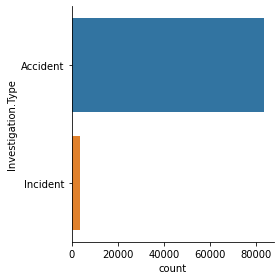

In [ ]:
sb.catplot(y="Investigation.Type", data = avi_acc, kind = "count", height = 4)

##### Event Year

We will now plot the categorical plot of **Event Year**.

Notice that **Year 1982** is dominating in the distribution of data. 

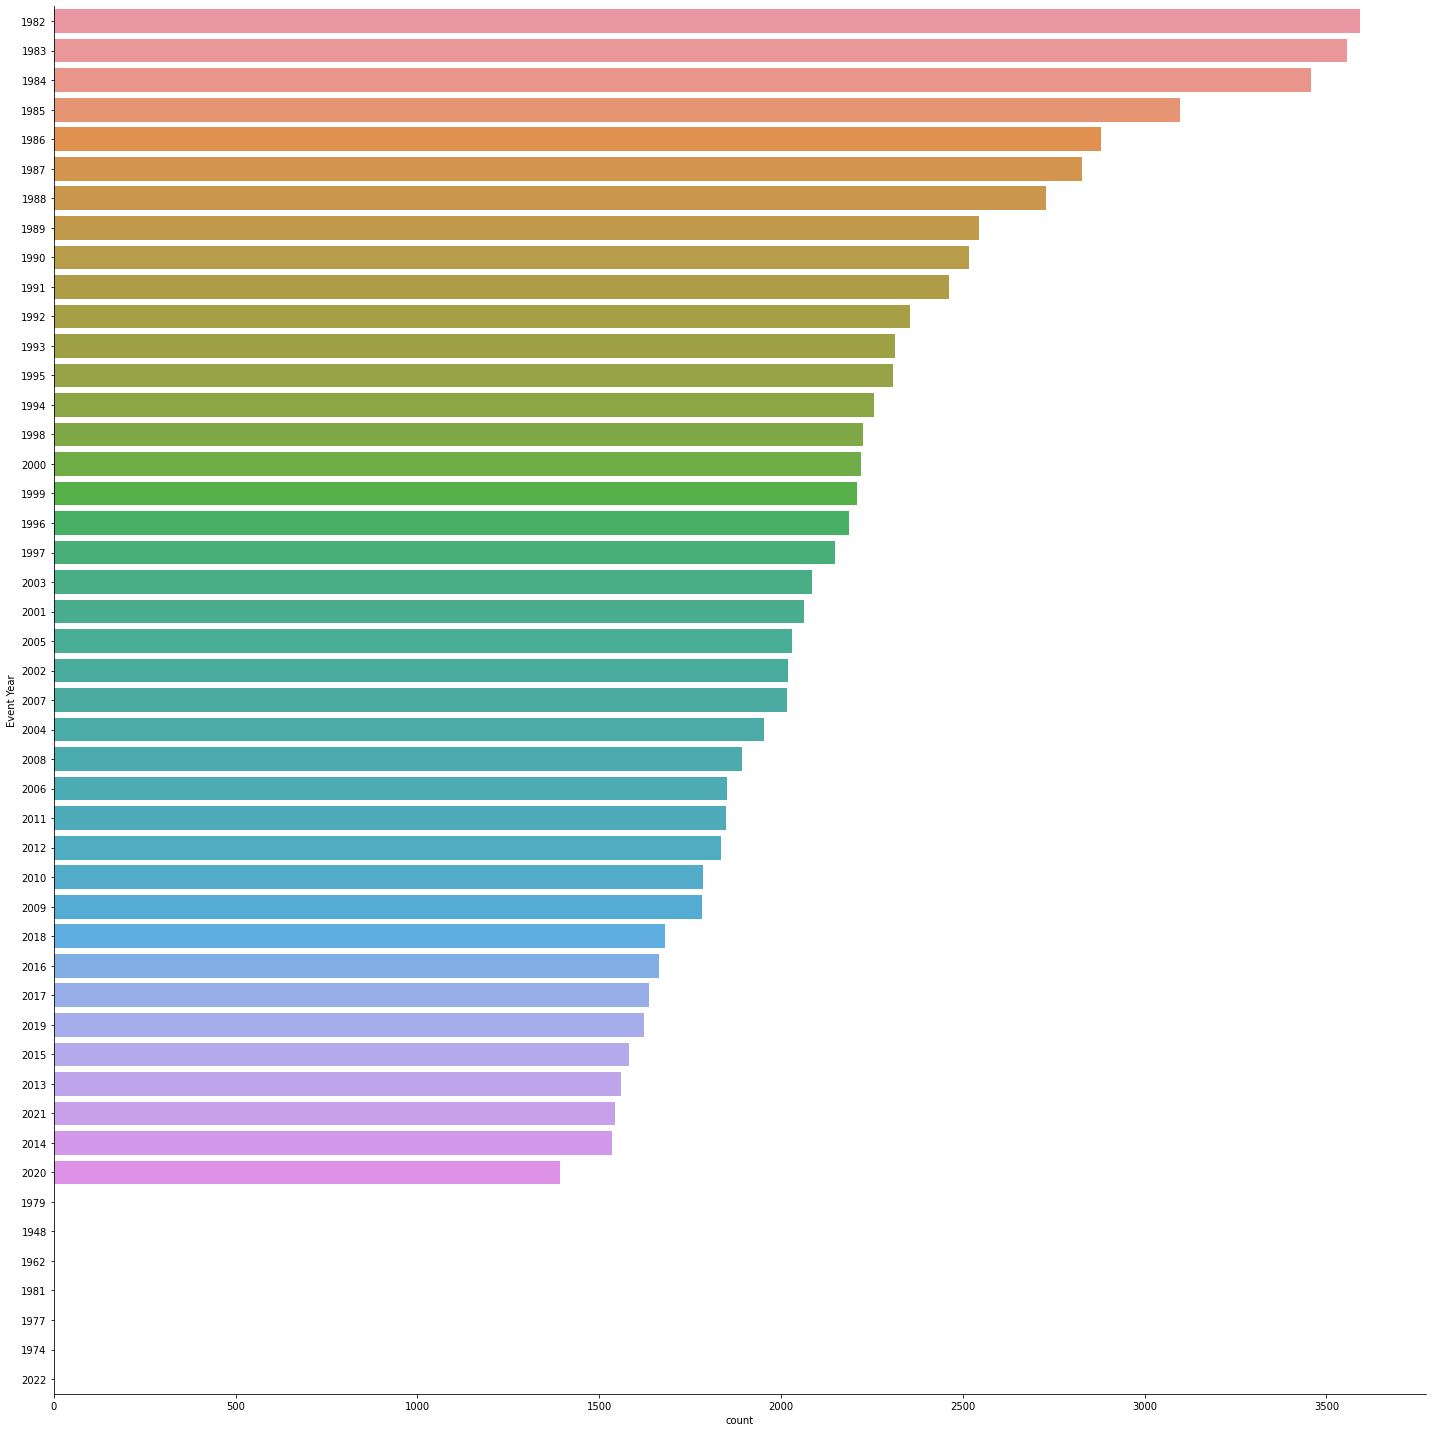

In [ ]:
sb.catplot(y = "Event Year" , data = avi_acc1, kind = "count", height = 20, 
           order = avi_acc1["Event Year"].value_counts().index)

In [ ]:
avi_acc1["Event Year"].value_counts()

1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1995    2309
1994    2257
1998    2226
2000    2220
1999    2209
1996    2187
1997    2148
2003    2085
2001    2063
2005    2031
2002    2020
2007    2016
2004    1952
2008    1893
2006    1851
2011    1850
2012    1835
2010    1786
2009    1783
2018    1681
2016    1664
2017    1638
2019    1624
2015    1582
2013    1561
2021    1544
2014    1535
2020    1392
1979       2
1948       1
1962       1
1981       1
1977       1
1974       1
2022       1
Name: Event Year, dtype: int64

We will now look at the change of number of aviation accident in a **time series plot**. 

Notice that number of aviation accident follows a trend of spike increase and then a gradual increase. 
- the initial low number of aviation accident mainly because aviation industry is not developed yet. 
- As reaching to 1980s, there is a spike development in aviation industry, causing the spike increase in aviation accident as the technology is not fully developed yet.
- As time passes, technology develops and hence causing a decrease in number of accidents.

**NOTE**: the sudden decrease of aviation accident in year 2022 may because of the data is only taken until the starting of the year. Hence, there should not be any value of reference.

Text(0, 0.5, 'Number of Aviation Accidents')

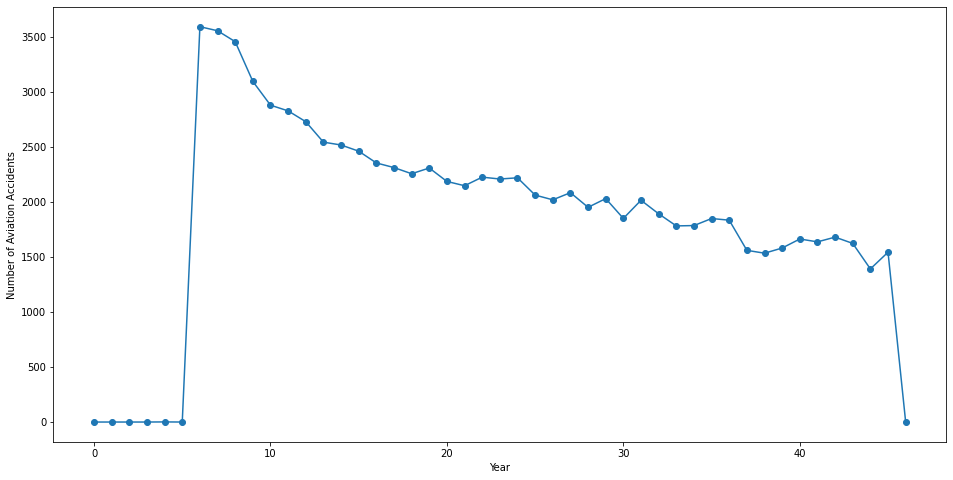

In [ ]:
f = plt.figure(figsize = (16,8))
time = pd.DataFrame(avi_acc1[["Event Year"]])
time = time.value_counts().rename_axis('Event Year').to_frame('counts')
time2 = time.groupby("Event Year").sum()
plt.plot(time2["counts"],marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of Aviation Accidents")

##### Injury.Severity

We will now plot the categorical plot of **Injury.Severity**.

Notice that **Non-fatal** is dominating in the distribution of data.

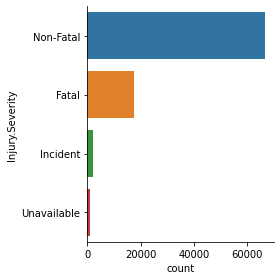

In [ ]:
sb.catplot(y = "Injury.Severity" , data = avi_acc1, kind = "count", height = 4, 
           order = avi_acc1["Injury.Severity"].value_counts().index)

In [ ]:
avi_acc1["Injury.Severity"].value_counts()

Non-Fatal      66561
Fatal          17523
Incident        2219
Unavailable      979
Name: Injury.Severity, dtype: int64

##### Make

We will now plot the categorical plot of **Make**.

Notice that there are 7409 types of unique categorical data of **Make** in the data.

In [ ]:
print("Number of unique data of MAKE:\t", len(avi_acc1["Make"].unique()))

Number of unique data of MAKE:	 7408


Therefore, we will not display all types of categorical data here. Instead, we will only choose the **top 10 categorical data of MAKE** with the highest number of aviation accident for visualization purpose.



From the data frame generated below, we can know that the top 10 MAKE that has the highest number of aviation accident consists of the following: `CESSNA`, `PIPER`, `BEECH`, `BELL`, `BOEING`, `MOONEY`, `ROBINSON`, `GRUMMAN`, `BELLANCA` and	`HUGHES`. 

In [ ]:
make_df = pd.DataFrame(avi_acc1["Make"])

make_counts = make_df.value_counts()
make_top10 = pd.DataFrame(make_counts[:10])
make_top10 = make_top10.reset_index()
make_top10.columns = ["Make", "Count"]
make_top10

,Make,Count
0,CESSNA,26776
1,PIPER,14647
2,BEECH,5305
3,BELL,2672
4,BOEING,2648
5,MOONEY,1312
6,ROBINSON,1206
7,GRUMMAN,1169
8,BELLANCA,1037
9,HUGHES,925


We will now look at the distribution of **MAKE**, by looking at the categorical plot. 

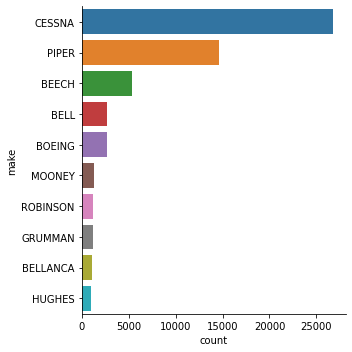

In [ ]:
top10_list = ['CESSNA', 'PIPER', 'BEECH', 'BELL', 'BOEING', 'MOONEY', 'ROBINSON', 'GRUMMAN', 'BELLANCA', 'HUGHES']
make10_list = []
for i in avi_acc1["Make"]:
    if i in top10_list:
        make10_list.append(i)
make10_df = pd.DataFrame(make10_list, columns = ["make"])
sb.catplot(y="make", data = make10_df, kind = "count",
          order = make10_df["make"].value_counts().index)

##### Amateur.Built

We will now look at the categorical plot of **Amateur.Built**. 

Notice that most of the plane which involves in aviation accident is **Not Amateur Built**.

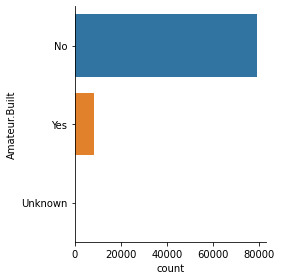

In [ ]:
sb.catplot(y = "Amateur.Built" , data = avi_acc1, kind = "count", height = 4, 
           order = avi_acc1["Amateur.Built"].value_counts().index)

In [ ]:
avi_acc1["Amateur.Built"].value_counts()

No         78826
Yes         8354
Unknown      102
Name: Amateur.Built, dtype: int64

##### Engine.Type

We will now look at the categorical plot of **Engine.Type**. 

Notice that most of the plane which involves in aviation accident is **reprocating**.

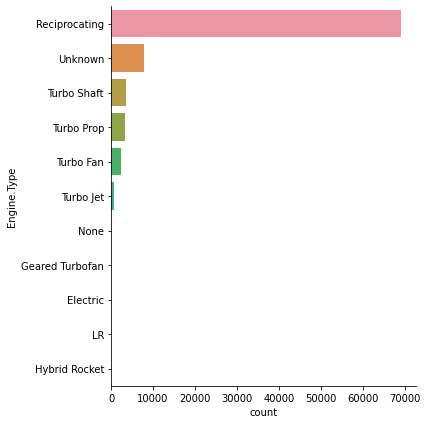

In [ ]:
sb.catplot(y = "Engine.Type" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Engine.Type"].value_counts().index)

In [ ]:
avi_acc1["Engine.Type"].value_counts()

Reciprocating      69159
Unknown             7942
Turbo Shaft         3585
Turbo Prop          3375
Turbo Fan           2476
Turbo Jet            702
None                  19
Geared Turbofan       12
Electric               9
LR                     2
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

##### Purpose.of.flight

We will now look at the categorical plot of **Purpose of flight**. 

Notice that most of the plane which involves in aviation accident is **Personal**.

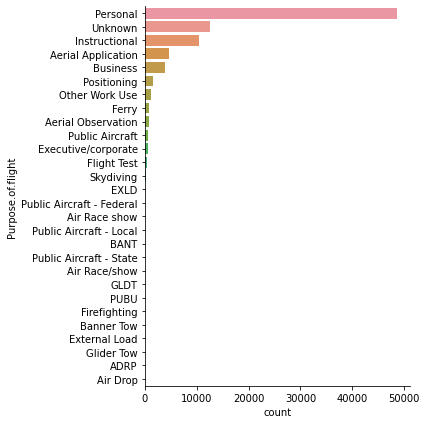

In [ ]:
sb.catplot(y = "Purpose.of.flight" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Purpose.of.flight"].value_counts().index)

In [ ]:
avi_acc1["Purpose.of.flight"].value_counts()

Personal                     48655
Unknown                      12586
Instructional                10417
Aerial Application            4658
Business                      3972
Positioning                   1621
Other Work Use                1237
Ferry                          807
Aerial Observation             779
Public Aircraft                679
Executive/corporate            550
Flight Test                    395
Skydiving                      177
EXLD                           100
Public Aircraft - Federal      100
Air Race show                   99
Public Aircraft - Local         74
BANT                            73
Public Aircraft - State         64
Air Race/show                   59
GLDT                            40
PUBU                            39
Firefighting                    35
Banner Tow                      25
External Load                   19
Glider Tow                      11
ADRP                             7
Air Drop                         4
Name: Purpose.of.fli

Notice that **Instructional** is one of the prime `purpose of flight` which is involved in aviation accident. As instructional flights are often flights carry out by inexperienced pilots, this increases the probabilty of occurance of aviation accident.  

##### Broad.phase.of.flight

We will now look at the categorical plot of Broad.phase.of.flight.

Note: 

| Phase of Flight | Phase Number |
| :-----------| :---------- |
| Taxi/Standing | 1 |
| Takeoff/Landing | 2 |
| Climb/Descent/Approach/Go-around | 3 |
| Cruise/Maneuvering | 4 |
| Others | 0 |


Notice that most of the aviation accident occurs during stage 2, which is **Takeoff and Landing period**.

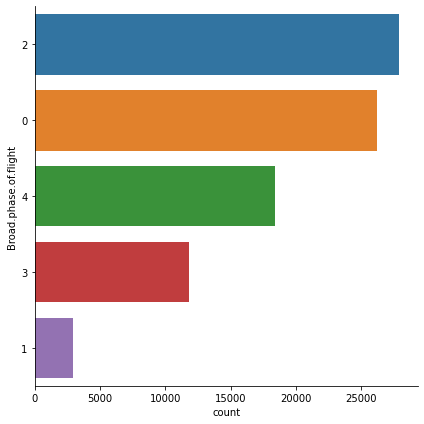

In [ ]:
sb.catplot(y = "Broad.phase.of.flight" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Broad.phase.of.flight"].value_counts().index)

In [ ]:
avi_acc1["Broad.phase.of.flight"].value_counts()

2    27921
0    26225
4    18413
3    11820
1     2903
Name: Broad.phase.of.flight, dtype: int64

##### Weather.Condition

We will now look at the categorical plot of Weather.Condition.

Note: 

**VMC (Visual Meteorological Conditions)**: Visibility more than 5km, cloudbase 1500 ft. Pilots can sufficiently and safely maintain visuals of all other aircraft and the terrain around them.

**IMC (Instrument Meterological Conditions)**: Any conditions worse than VMC, pilots need to rely on instruments.

**Unk/UNK (Unknown)**: Weather condition unknown.

Notice that the weather condition of **VMC** has the highest amount of aviation accident. 

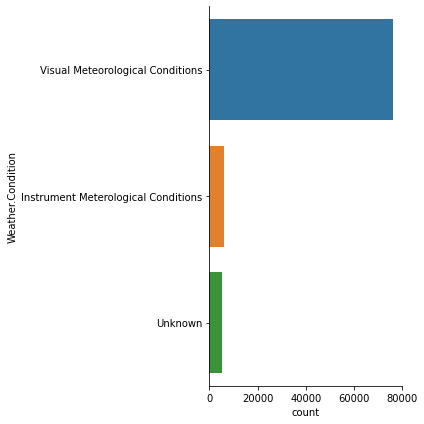

In [ ]:
sb.catplot(y = "Weather.Condition" , data = avi_acc1, kind = "count", height = 6, 
           order = avi_acc1["Weather.Condition"].value_counts().index)

In [ ]:
avi_acc1["Weather.Condition"].value_counts()

Visual Meteorological Conditions       76251
Instrument Meterological Conditions     5944
Unknown                                 5087
Name: Weather.Condition, dtype: int64

#### Geospatial Visualization

For the sake of simplicity, we will just deal with cases happening in **United States** and drop data sets from other countries. 

The dataframe below shows the US_State and the respective Abbreviation.

In [ ]:
USStates_codes = pd.read_csv("USState_Codes.csv")
USStates_codes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [ ]:
location_df = avi_acc.copy()
short_list = USStates_codes["Abbreviation"].tolist()
long_list = USStates_codes["US_State"].tolist()
location_list = []
count = 0

for i in location_df["Location"]:
    last = i.split(", ")
    if last[-1] in short_list:
        location_list.append(last[-1])
    
states_df = pd.DataFrame(data = location_list, columns = ["States"])
states_count = pd.DataFrame(states_df.value_counts()).reset_index()
states_count.columns = ["States", "Count"]

In [ ]:
pip install plotly==5.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


The map below gives us an overview on the hotspots where aviation accidents happen. 

We can observe that **California (CA)** has the highest occurance of accident of all, where it reaches case number of 8746 throughtout these years.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=states_count['States'], # Spatial coordinates
    z = states_count["Count"],
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'ylorrd',
    colorbar_title = "Number of accidents",
))

fig.update_layout(
    title_text = 'Total Number of Aviation Accidents by State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

Now we will look into the column of **STATES** and use regular expression `re.sub` to rename the abbreviated states to its full name. 

Then, we will look at the **catplot** for each of the states. Notice, catplot has show exactly the same result as the Geospatial Visualization above. 

In [ ]:
import re

states_df["States"]=states_df["States"].apply(lambda x: re.sub('AL', 'Alabama', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AK', 'Alaska', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AZ', 'Arizona', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AR', 'Arkansas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CA', 'California', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CO', 'Colorado', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('CT', 'Connecticut', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('DE', 'Delaware', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('FL', 'Florida', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GA', 'Georgia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('HI', 'Hawaii', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ID', 'Idaho', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IL', 'Illinois', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IN', 'Indiana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('IA', 'Iowa', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('KS', 'Kansas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('KY', 'Kentucky', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('LA', 'Louisiana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ME', 'Maine', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MD', 'Maryland', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MA', 'Massachusetts', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MI', 'Michigan', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MN', 'Minnesota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MS', 'Mississippi', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MO', 'Missouri', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MT', 'Montana', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NE', 'Nebraska', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NV', 'Nevada', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NH', 'New Hampshire', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NJ', 'New Jersey', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NM', 'New Mexico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NY', 'New York', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('NC', 'North Carolina', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('ND', 'North Dakota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OH', 'Ohio', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OK', 'Oklahoma', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('OR', 'Oregon', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PA', 'Pennsylvania', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('RI', 'Rhode Island', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('SC', 'South Carolina', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('SD', 'South Dakota', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('TN', 'Tennessee', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('TX', 'Texas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('UT', 'Utah', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VT', 'Vermont', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VA', 'Virginia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WA', 'Washington', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WV', 'West Virginia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WI', 'Wisconsin', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('WY', 'Wyoming', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AS', 'American Samoa', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GU', 'Guam', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MH', 'Marshall Islands', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('FM', 'Micronesia', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('MP', 'Northern Marianas', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PW', 'Palau', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PR', 'Puerto Rico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('VI', 'Virgin Islands', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('DC', 'Washington_DC', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('GM', 'Gulf of mexico', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('AO', 'Atlantic ocean', x))
states_df["States"]=states_df["States"].apply(lambda x: re.sub('PO', 'Pacific ocean', x))

states_df.value_counts()

States        
California        8746
Texas             5797
Florida           5746
Alaska            5591
Arizona           2782
Colorado          2692
Washington        2579
Illinois          2029
Michigan          2014
Georgia           1983
New York          1888
Ohio              1793
Pennsylvania      1754
Oregon            1748
North Carolina    1632
Missouri          1547
Wisconsin         1536
Arkansas          1498
Minnesota         1433
Idaho             1409
New Mexico        1343
Utah              1309
Indiana           1300
Virginia          1255
Oklahoma          1219
Nevada            1215
Louisiana         1200
New Jersey        1156
Alabama           1134
Kansas            1088
Tennessee         1081
Montana           1036
Massachusetts      959
South Carolina     952
Iowa               808
Mississippi        804
Maryland           799
Wyoming            727
Nebraska           710
Kentucky           636
North Dakota       554
Maine              499
Connecticut        

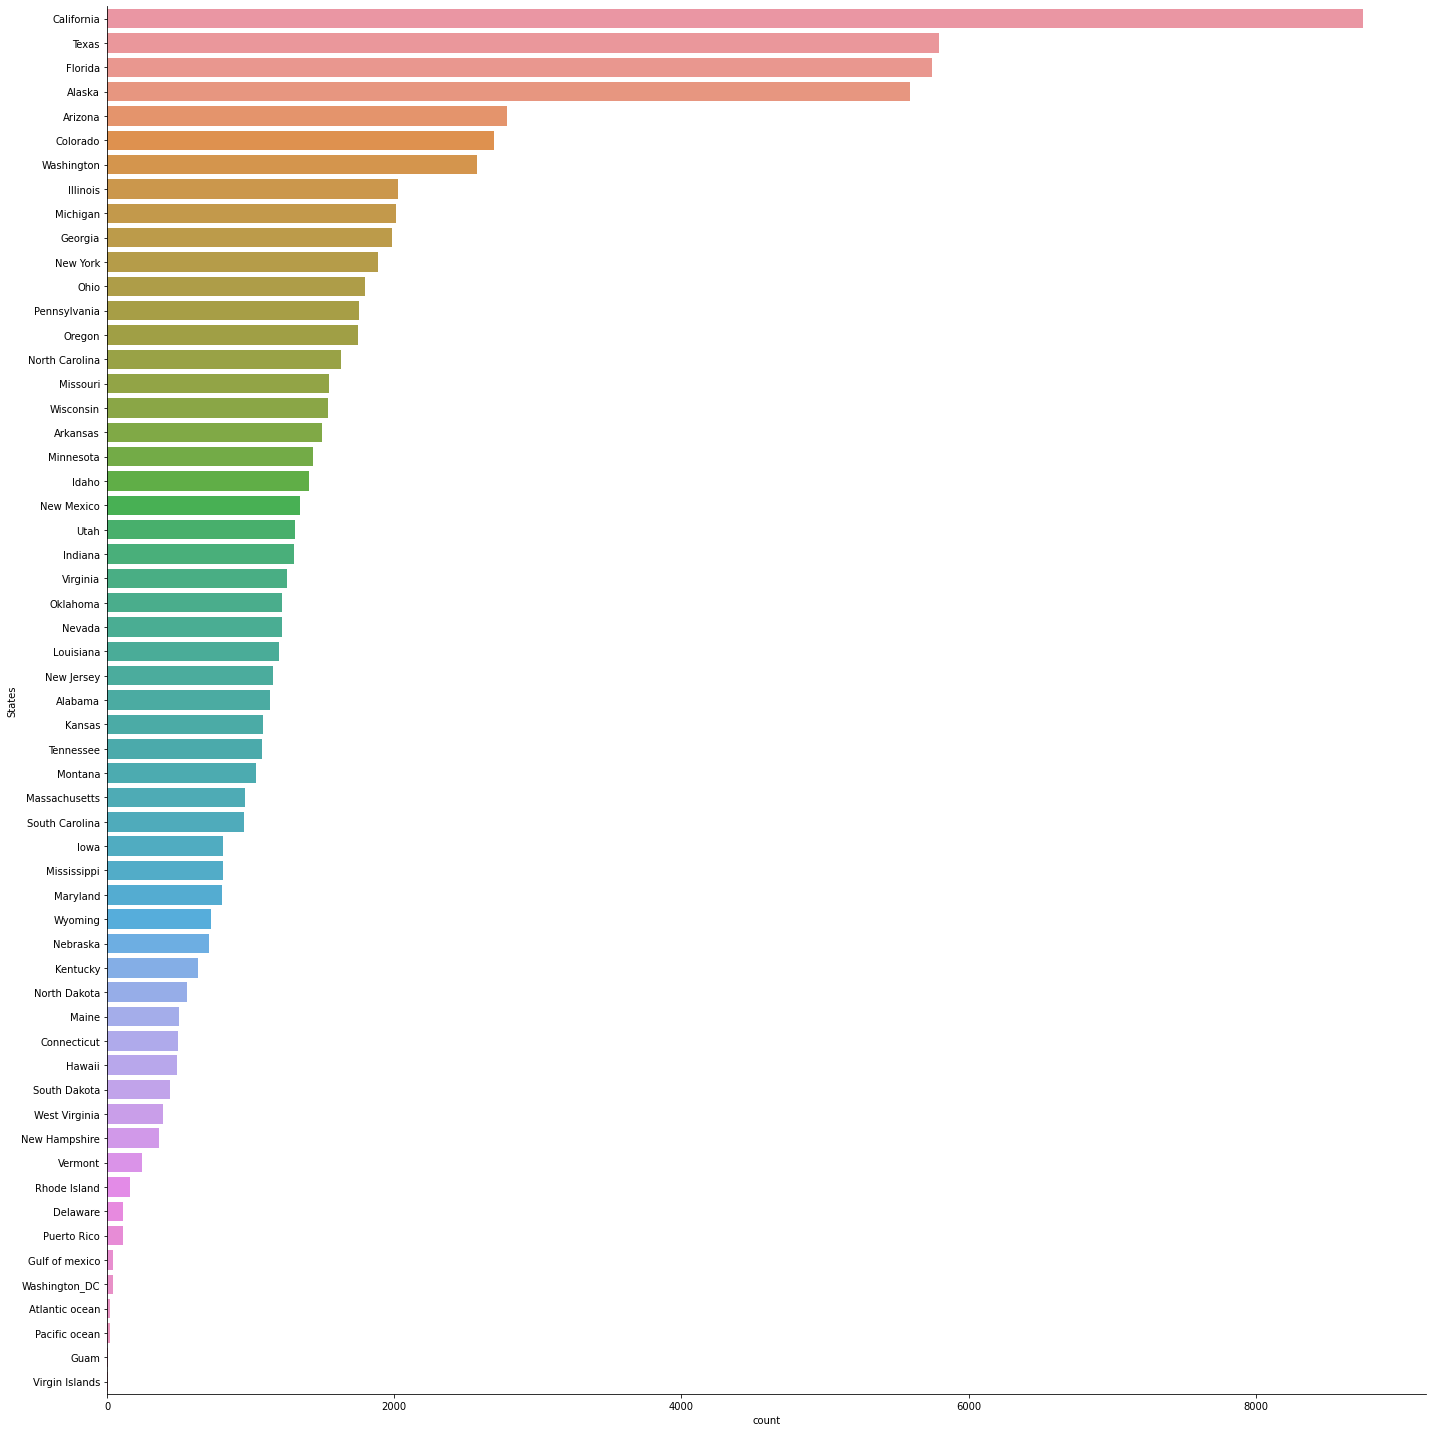

In [ ]:
sb.catplot(y = "States" , data = states_df, kind = "count", height = 20, 
           order = states_df["States"].value_counts().index)

### Bi-Variate Statistics

In [ ]:
avi_acc1

,Accident.Number,Investigation.Type,Event Year,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal.rate,Number of plane involved
0,SEA87LA080,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,3,STINSON,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,4,100.000000,1.0
1,LAX94LA336,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,3,PIPER,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
2,NYC07LA005,Accident,1974,"Saltville, VA",United States,Fatal,3,CESSNA,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Instrument Meterological Conditions,4,75.000000,1.0
3,LAX96LA321,Accident,1977,"EUREKA, CA",United States,Fatal,3,ROCKWELL,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Instrument Meterological Conditions,4,100.000000,1.0
4,CHI79FA064,Accident,1979,"Canton, OH",United States,Fatal,3,CESSNA,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,Visual Meteorological Conditions,3,33.330002,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,GAA22WA054,Accident,2021,"Auxerre, OF",United States,Fatal,3,CIRRUS DESIGN CORP,No,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
87278,WPR22LA069,Accident,2021,"Auburn, CA",United States,Non-Fatal,0,CESSNA,No,1.0,Unknown,Positioning,0.0,0.0,1.0,0.0,Unknown,0,0.000000,1.0
87279,CEN22FA082,Accident,2021,"Hardy, AR",United States,Fatal,0,CESSNA,No,1.0,Unknown,Personal,2.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
87280,ERA22LA097,Accident,2021,"Marathon, FL",United States,Non-Fatal,0,CESSNA,No,1.0,Unknown,Unknown,0.0,3.0,0.0,0.0,Unknown,0,0.000000,1.0


#### Relationship between the Response Variables

For this proejct, we are only concerned on two response variables, namely `Fatal Rate` and `Aircraft damage`. To find the relationship between these two variables, we will look at the **boxplot** of two variables. 

By observing the clustering and distribution of points, we can observe that as the Aircraft damage level increases (from 0 to 3), the fatal rate also increases as more and more data points will accumulate at the section of high fatal rate.

<Figure size 1296x288 with 0 Axes>

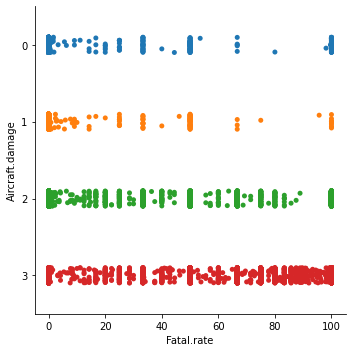

In [ ]:
f = plt.figure(figsize = (18,4))
sb.catplot(x = "Fatal.rate", y = "Aircraft.damage", data = avi_acc1, orient = 'h')

### Statistical Summary: Numerical Variables (Multi-variate) vs Fatal.rate (Numeric)

In [ ]:
numeric_df = avi_acc1[["Fatal.rate", "Number.of.Engines", "Number of plane involved"]]

This shows the correlation values (in table, heatmap and grid pairs) between multi-variables.

In [ ]:
numeric_df.corr()

,Fatal.rate,Number.of.Engines,Number of plane involved
Fatal.rate,1.000000,0.023164,0.016298
Number.of.Engines,0.023164,1.000000,0.051406
Number of plane involved,0.016298,0.051406,1.000000


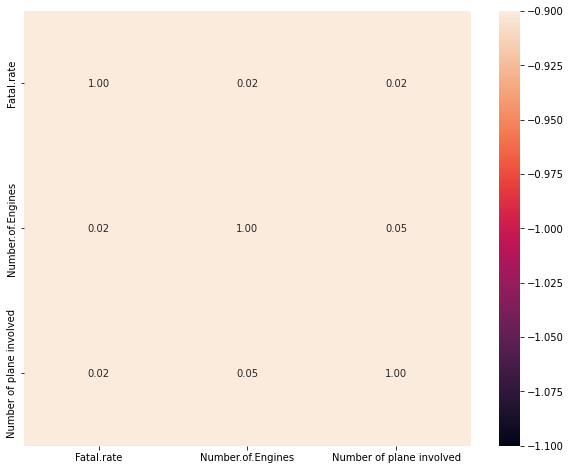

In [ ]:
f = plt.figure(figsize = (10,8))
sb.heatmap(numeric_df.corr(), vmin = -1, vmax = -1, annot = True, fmt = ".2f")

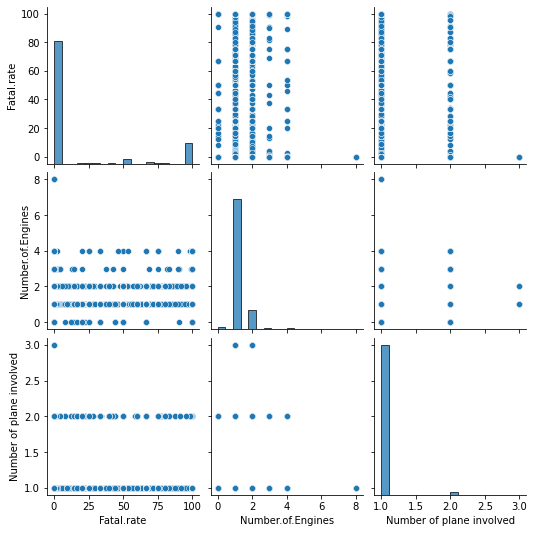

In [ ]:
sb.pairplot(data = numeric_df)

From the heat map and the pair plot of the correlation of the numerical variables and the numerical predictor, we can tell that the correlation is **extremely low**. From the pairplot, we can deduce that there is definitely no linear relationship between the numerical variables and Fatal.rate. 

### Statistical Summary: Categorical Variables (Multi-variate) vs Aircraft Damage (Categorical)

#### Distribution of Investiagtion Type against each form of Aircraft Damage in terms of categorical plot and heatmap.

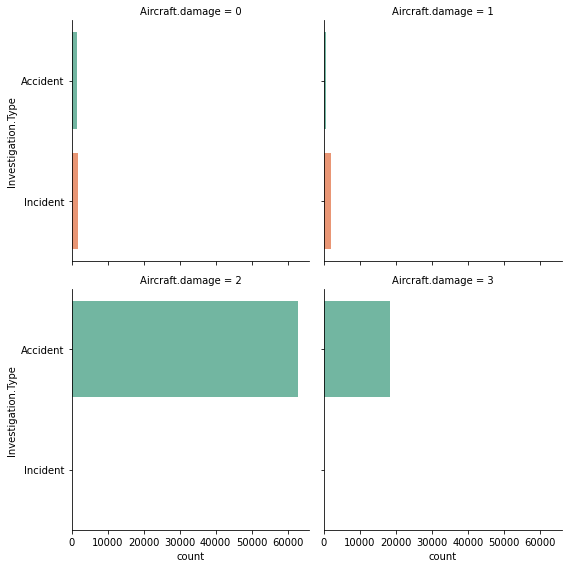

In [ ]:
sb.catplot(y = "Investigation.Type", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Investigation Type vs Aircraft Damage')

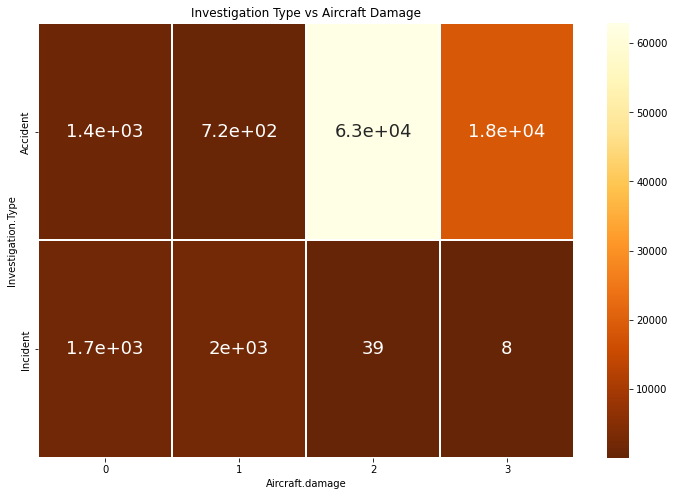

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Investigation.Type", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Investigation Type vs Aircraft Damage")

**Comments:**


Notice that for a lower level of aircraft damage, it is mainly due to Incident and when the aircraft damage level increases, the main Investigation Type falls into accident.

#### Distribution of Location against each form of Aircraft Damage in terms of categorical plot and heatmap.

For simplicity purposes, we will only look at the aviation accident occuring in United States and not other country. We will first do some data cleaning and only shows data in United States.

In [ ]:
USStates_codes = pd.read_csv("USState_Codes.csv")
USStates_codes

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
...,...,...
57,Virgin Islands,VI
58,Washington_DC,DC
59,Gulf of mexico,GM
60,Atlantic ocean,AO


In [ ]:
cleanstates_df = states_df.copy()
location_list = avi_acc1["Location"].tolist()
damage_list = avi_acc1["Aircraft.damage"].tolist()
damage_clean_list = []
clean_short_list = USStates_codes["Abbreviation"].tolist()
count = 0
shortlist = []
for i in range(0,len(avi_acc1)):
    exact_location_str = location_list[i]
    shortlist = exact_location_str.split(", ")
    clean_short = str(shortlist[-1])
    if clean_short in clean_short_list:
        damage_clean_list.append(damage_list[i])
    shortlist = []
cleanstates_df["Aircraft.damage"] = damage_clean_list
cleanstates_df

,States,Aircraft.damage
0,Idaho,3
1,California,3
2,Virginia,3
3,California,3
4,Ohio,3
...,...,...
80914,Indiana,0
80915,Arizona,0
80916,California,0
80917,Arkansas,0


We will now look at the **categorical plot  and heat map** of states in United States with Aircraft Damage.

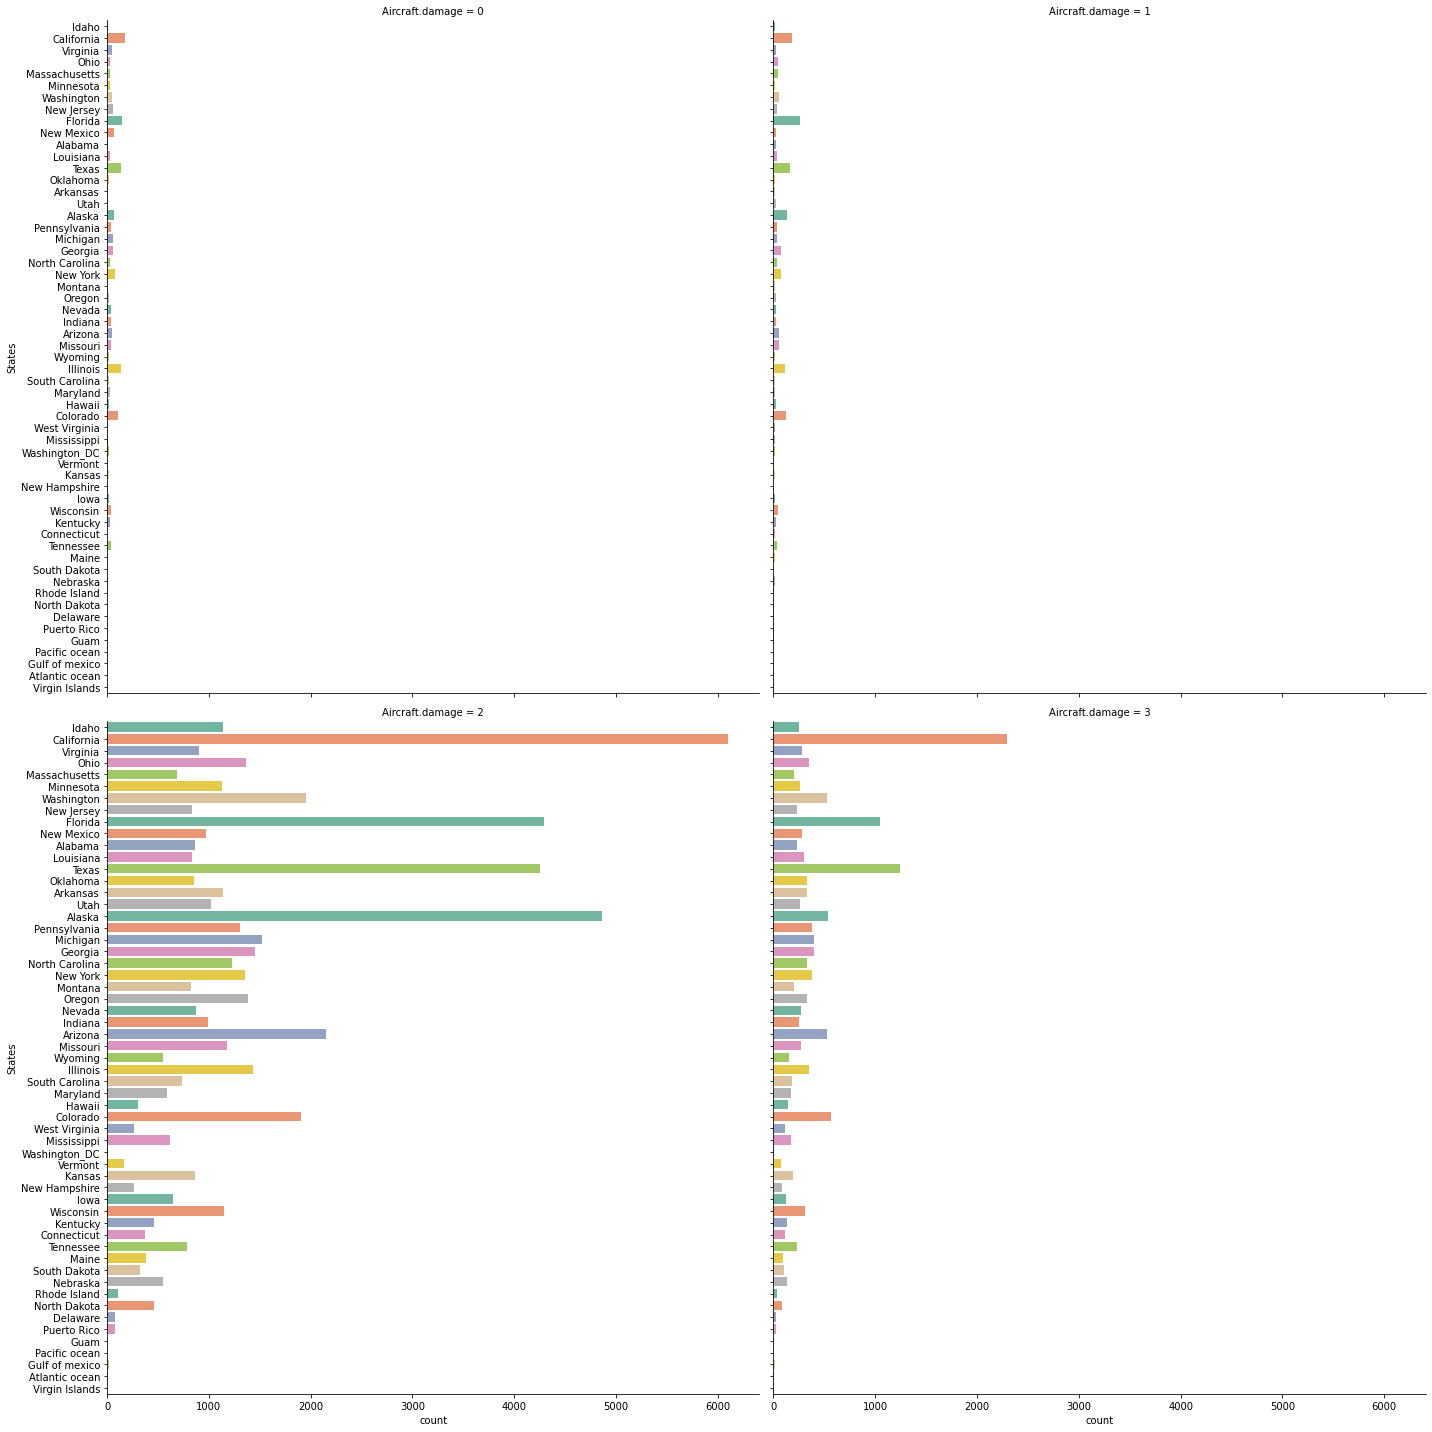

In [ ]:
sb.catplot(y = "States", data = cleanstates_df, col = "Aircraft.damage", kind = "count", col_wrap=2, height=10, 
          palette = 'Set2')

Text(0.5, 1.0, 'States in US vs Aircraft Damage')

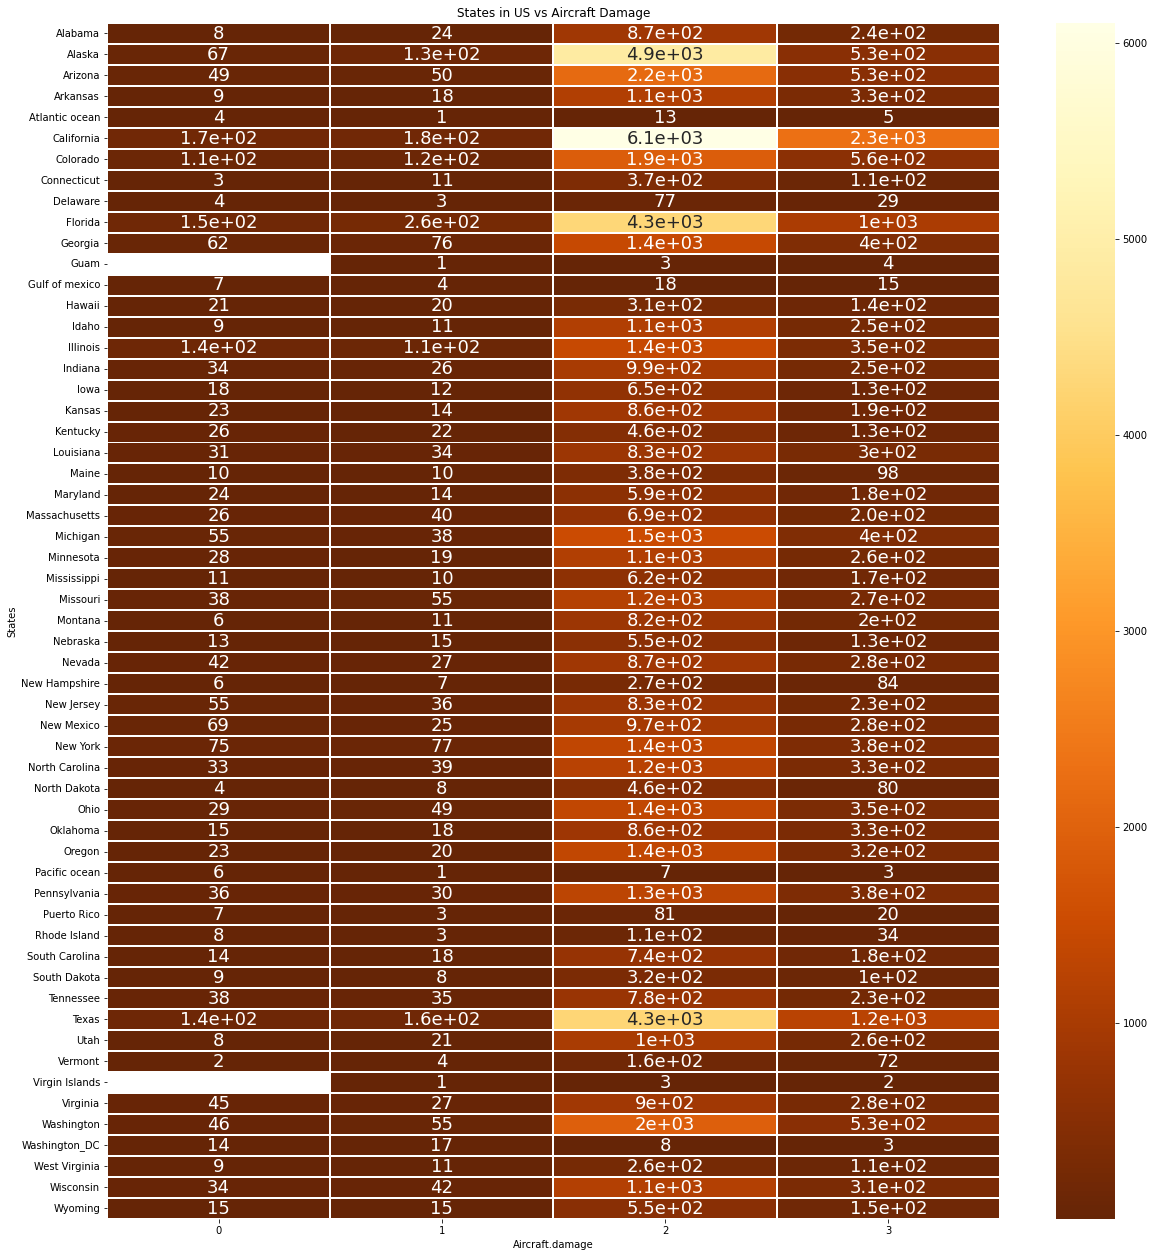

In [ ]:
f = plt.figure(figsize = (20,22))
sb.heatmap(cleanstates_df.groupby(["States", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("States in US vs Aircraft Damage")

**Comments**

Notice that most of the avaition accident occuring in United States suffer from a level 3 aircraft damage. Despite the fact that California having the highest number of aviation accident, we can also notice that most of the aviation accident happen in ths state suffer from a high level of aircraft damage. 

#### Distribution of Injury Severity against each form of Aircraft Damage in terms of categorical plot and heatmap.

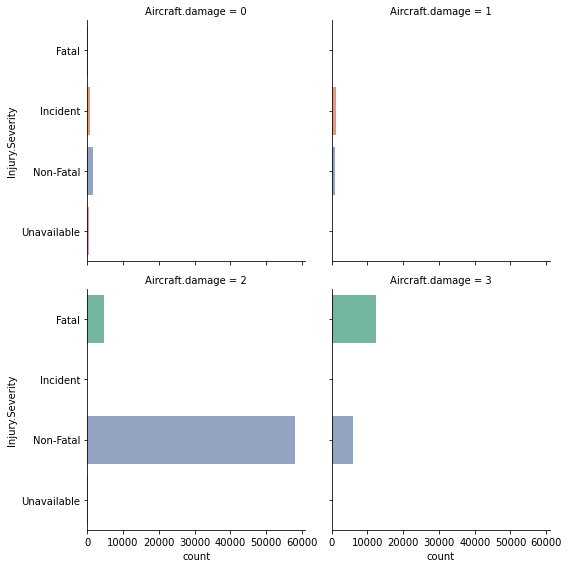

In [ ]:
sb.catplot(y = "Injury.Severity", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Injury.Severity vs Aircraft Damage')

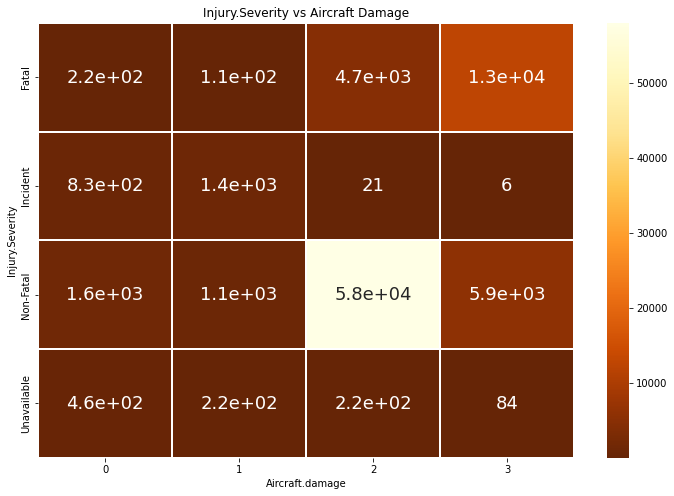

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Injury.Severity", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Injury.Severity vs Aircraft Damage")

**Comments**

As the aircraft damage level increases, the number of fatal cases also increases. As for non-fatal cases (consists of injuries but not fatal), they are mostly in the aircraft damage level 3. (1 being the lowest level and 3 being highest level)

#### Distribution of Amateur Built against each form of Aircraft Damage in terms of categorical plot and heatmap.

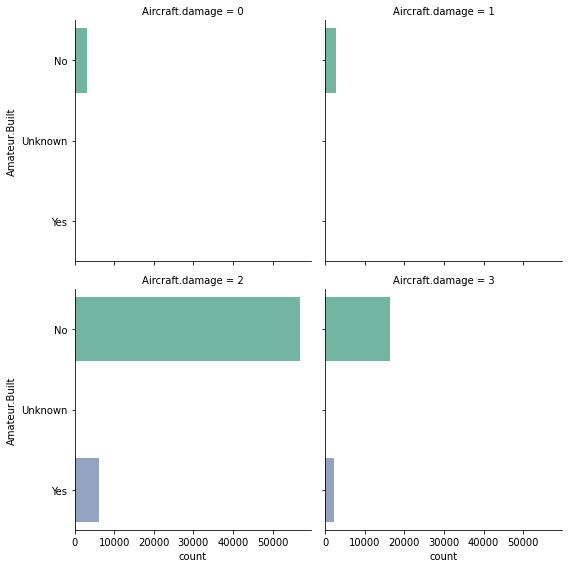

In [ ]:
sb.catplot(y = "Amateur.Built", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Amateur.Built vs Aircraft Damage')

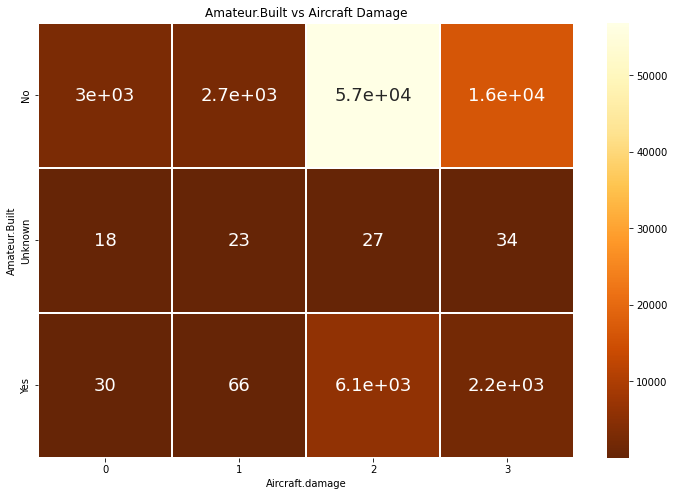

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Amateur.Built", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Amateur.Built vs Aircraft Damage")

Most of the datasets fall into the level 3 of aircraft damage. In general, we can see that the number of non-amateur built is higher than the amateur built. 

As for the amateur built, they usually have a high level of aircraft damage (level 2 and 3) as compared to the non_amateur built. 

#### Distribution of Engine Type against each form of Aircraft Damage in terms of categorical plot and heatmap.

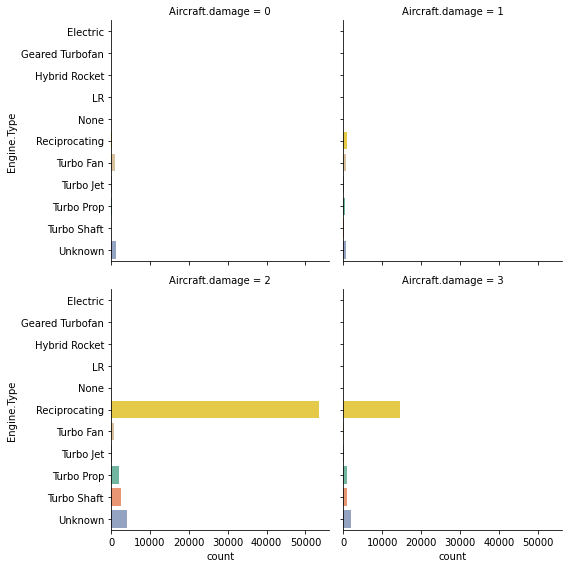

In [ ]:
sb.catplot(y = "Engine.Type", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Engine Type vs Aircraft Damage')

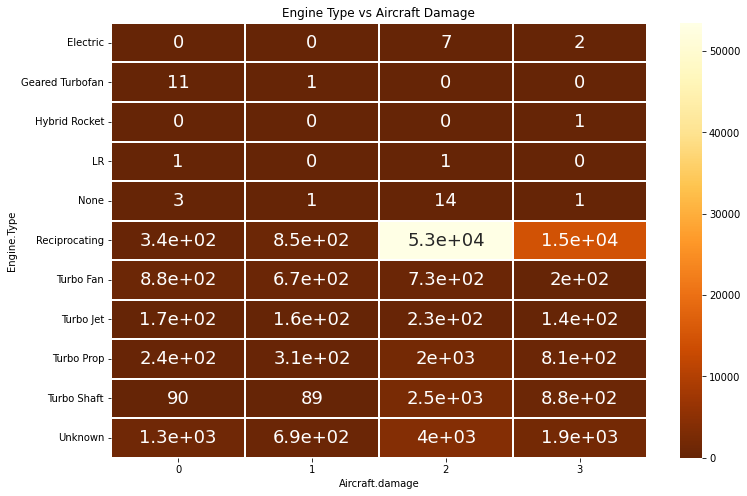

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Engine.Type", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Engine Type vs Aircraft Damage")

**Comments**

We can see that reciprocating engine type contirbutes to most of the number of aviation accident. Usually when it involves reciprocating engine type, the aircraft damage is relatively higher than the other types of engine. 

#### Distribution of Purpose of Flight against each form of Aircraft Damage in terms of categorical plot and heatmap.

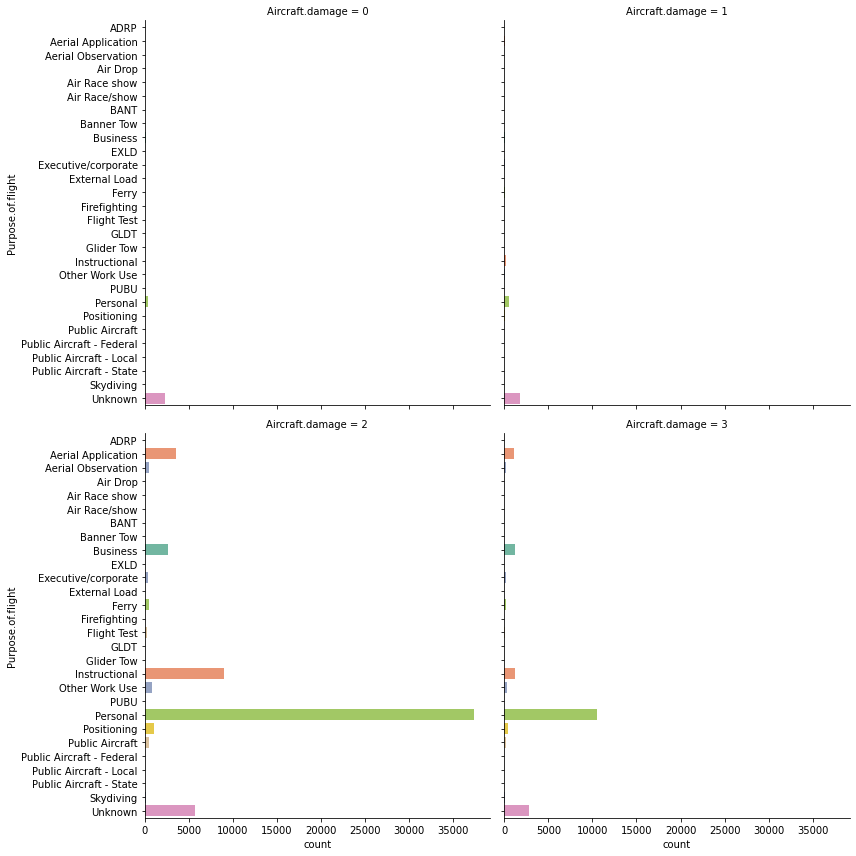

In [ ]:
sb.catplot(y = "Purpose.of.flight", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=6, 
          palette = 'Set2')

Text(0.5, 1.0, 'Purpose.of.flight vs Aircraft Damage')

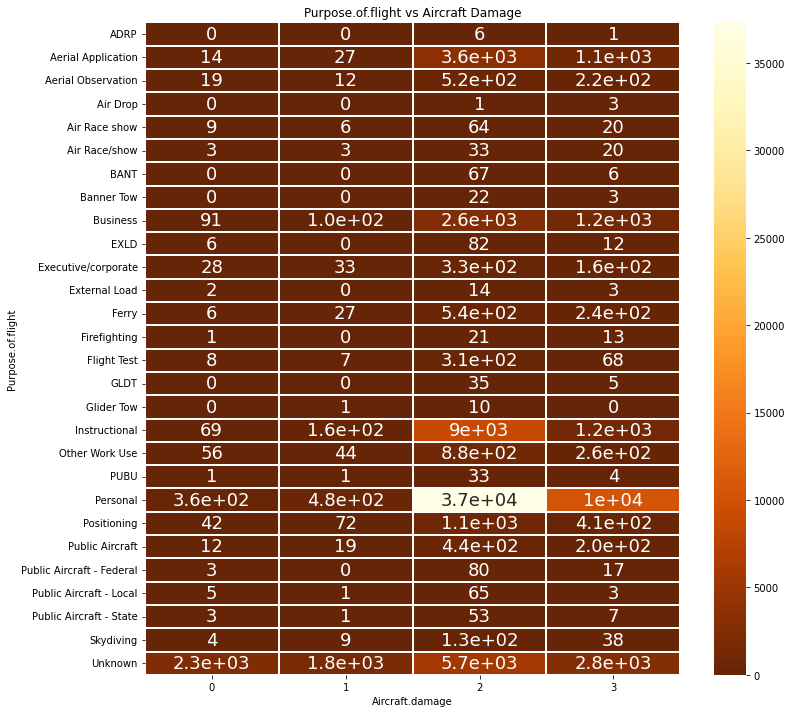

In [ ]:
f = plt.figure(figsize = (12,12))
sb.heatmap(avi_acc1.groupby(["Purpose.of.flight", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Purpose.of.flight vs Aircraft Damage")

#### Distribution of Weather Condition against each form of Aircraft Damage in terms of categorical plot and heatmap.

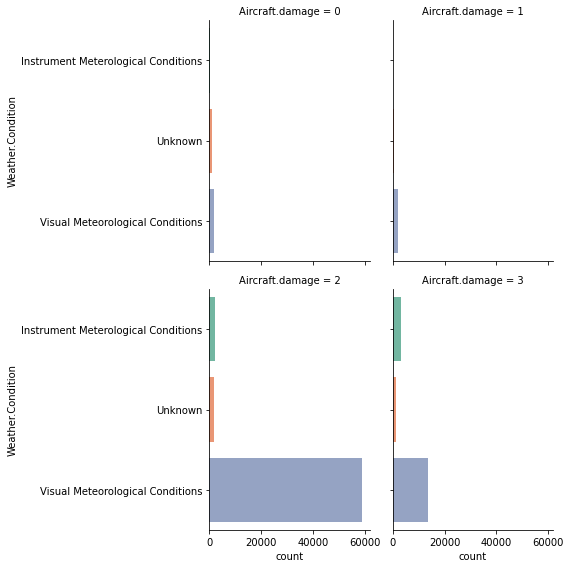

In [ ]:
sb.catplot(y = "Weather.Condition", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Injury.Severity vs Aircraft Damage')

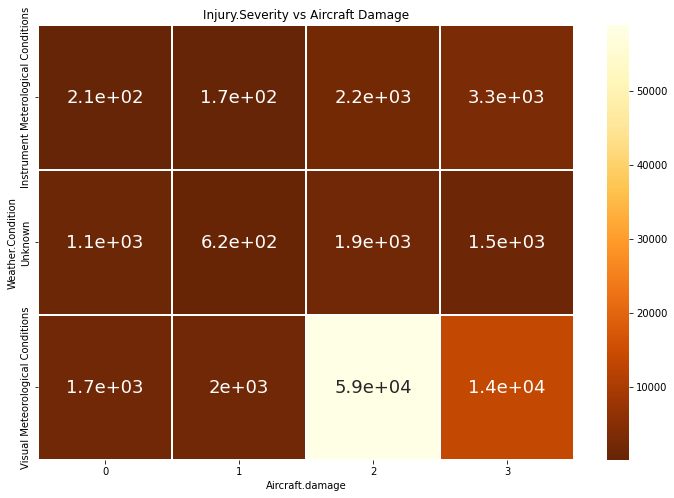

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Weather.Condition", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Injury.Severity vs Aircraft Damage")

#### Distribution of Broad Phase of Flight against each form of Aircraft Damage in terms of categorical plot and heatmap.

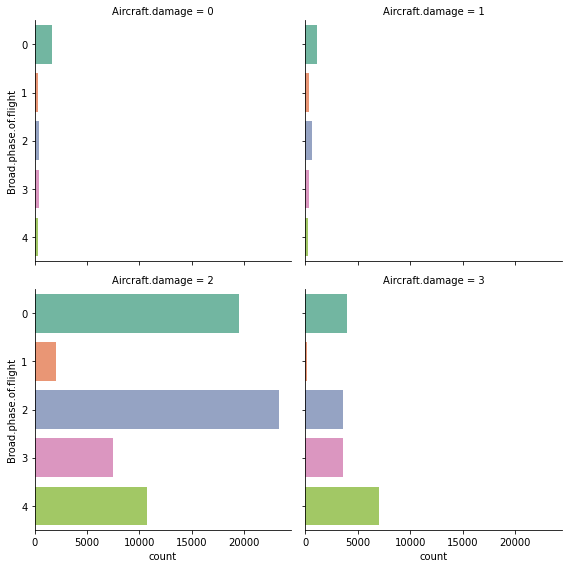

In [ ]:
sb.catplot(y = "Broad.phase.of.flight", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=4, 
          palette = 'Set2')

Text(0.5, 1.0, 'Broad.phase.of.flight vs Aircraft Damage')

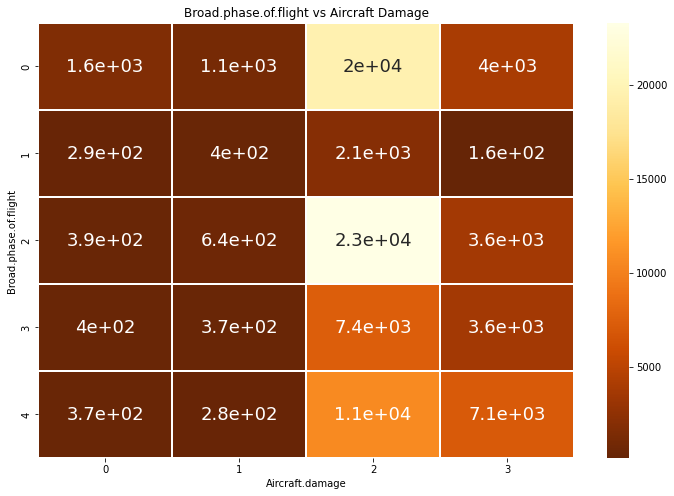

In [ ]:
f = plt.figure(figsize = (12,8))
sb.heatmap(avi_acc1.groupby(["Broad.phase.of.flight", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Broad.phase.of.flight vs Aircraft Damage")

**Comments** 

Notice that broad phase of flight number **4** has the highest aircraft damage. Recall phase 4 refers to Cruise/Maneuvering which is the period when plane is at the furthest distance from ground. Hence, this explains the high level of aircraft damage as compared to other factors.

#### Distribution of Event Year against each form of Aircraft Damage in terms of categorical plot and heatmap.

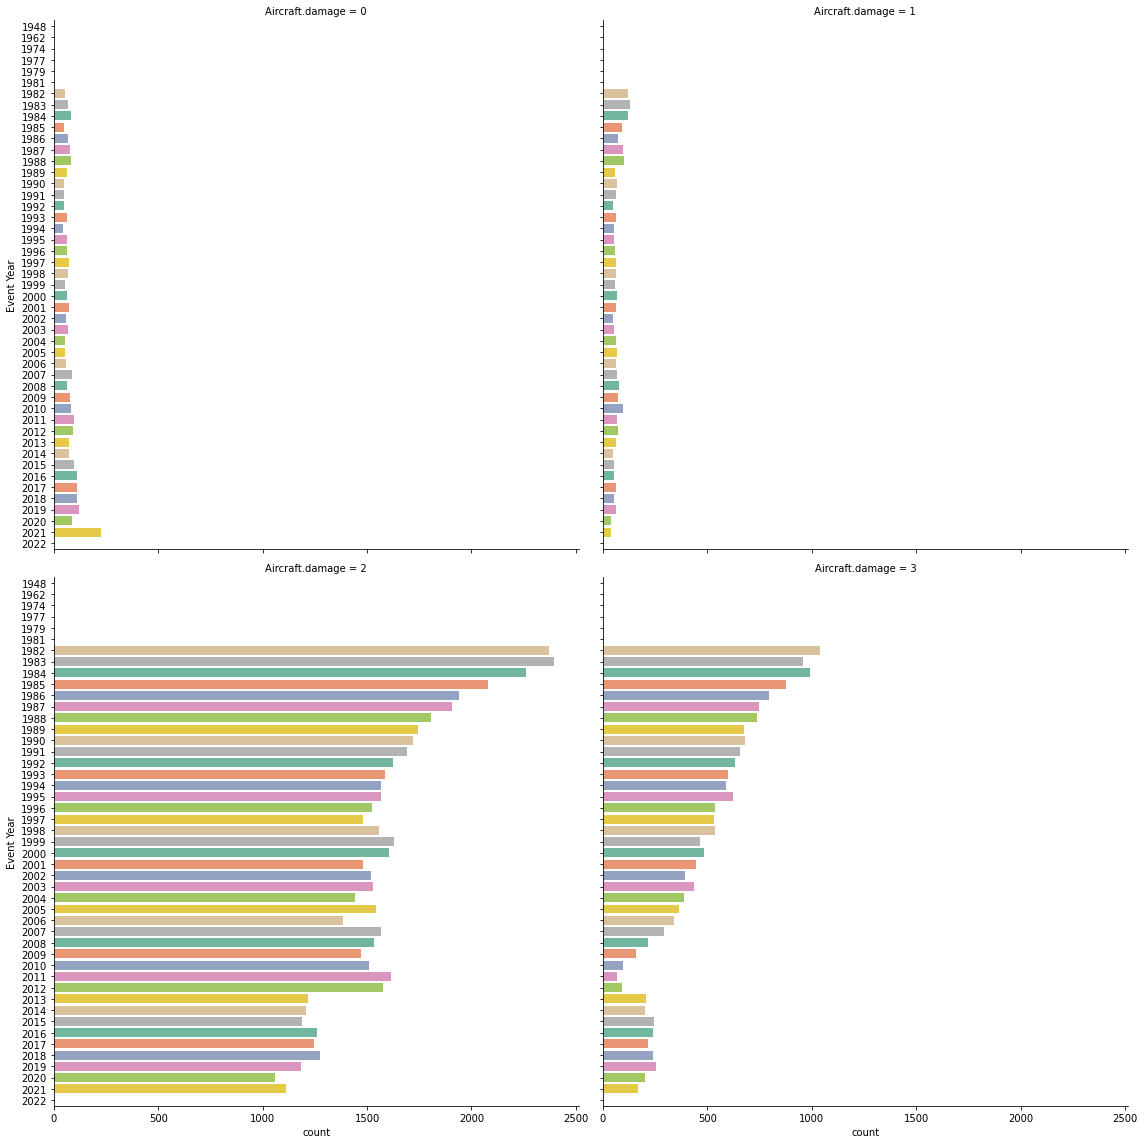

In [ ]:
sb.catplot(y = "Event Year", data = avi_acc1, col = "Aircraft.damage", kind = "count", col_wrap=2, height=8, 
          palette = 'Set2')

Text(0.5, 1.0, 'Injury.Severity vs Aircraft Damage')

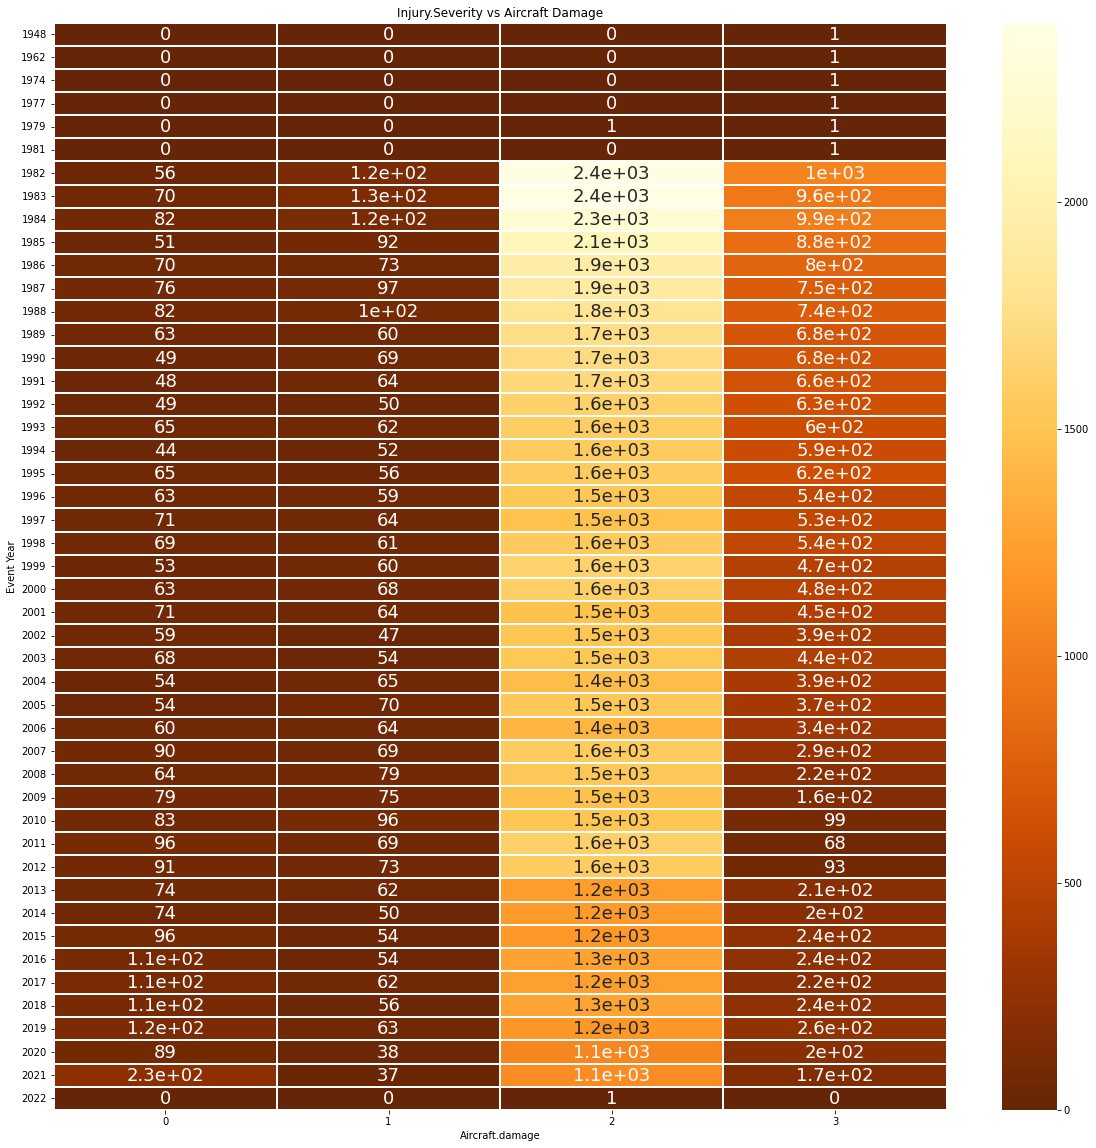

In [ ]:
f = plt.figure(figsize = (20,20))
sb.heatmap(avi_acc1.groupby(["Event Year", "Aircraft.damage"]).size().unstack(),
           linewidths = 1, annot = True, annot_kws = {"size":18}, cmap = "YlOrBr_r")
plt.title("Injury.Severity vs Aircraft Damage")

**Comments**

Notice that when the number of years increases, the aircraft damage level drcreases. It suggests that the advancement of technology throughout the years has made the airplane to be more qualitied and can withstand greater impact. 

***

## Machine Learning 

Our dataset is from Kaggle: **"Aviation Accident Database & Synopses"** by *Kheiralllah Samaha*\
Source: https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses \
Description of data available at https://www.ntsb.gov/_layouts/15/ntsb.aviation/AviationDownloadDataDictionary.aspx

We will first extract the dataset and assign to a new dataset named **avi_acc2** 

In [ ]:
avi_acc2 = avi_acc.copy()
avi_acc2

,Accident.Number,Investigation.Type,Event Year,Location,Country,Injury.Severity,Aircraft.damage,Make,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Fatal.rate,Number of plane involved
0,SEA87LA080,Accident,1948,"MOOSE CREEK, ID",United States,Fatal,3,STINSON,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Unknown,4,100.000000,1.0
1,LAX94LA336,Accident,1962,"BRIDGEPORT, CA",United States,Fatal,3,PIPER,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
2,NYC07LA005,Accident,1974,"Saltville, VA",United States,Fatal,3,CESSNA,No,1.0,Reciprocating,Personal,3.0,0.0,0.0,1.0,Instrument Meterological Conditions,4,75.000000,1.0
3,LAX96LA321,Accident,1977,"EUREKA, CA",United States,Fatal,3,ROCKWELL,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,Instrument Meterological Conditions,4,100.000000,1.0
4,CHI79FA064,Accident,1979,"Canton, OH",United States,Fatal,3,CESSNA,No,1.0,Unknown,Personal,1.0,2.0,0.0,0.0,Visual Meteorological Conditions,3,33.330002,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87277,GAA22WA054,Accident,2021,"Auxerre, OF",United States,Fatal,3,CIRRUS DESIGN CORP,No,1.0,Unknown,Unknown,1.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
87278,WPR22LA069,Accident,2021,"Auburn, CA",United States,Non-Fatal,0,CESSNA,No,1.0,Unknown,Positioning,0.0,0.0,1.0,0.0,Unknown,0,0.000000,1.0
87279,CEN22FA082,Accident,2021,"Hardy, AR",United States,Fatal,0,CESSNA,No,1.0,Unknown,Personal,2.0,0.0,0.0,0.0,Unknown,0,100.000000,1.0
87280,ERA22LA097,Accident,2021,"Marathon, FL",United States,Non-Fatal,0,CESSNA,No,1.0,Unknown,Unknown,0.0,3.0,0.0,0.0,Unknown,0,0.000000,1.0


In this section, we perform our Machine Learning part. The following ML models from ```scikit-learn``` are used:

---
**Data Preprocessing**
- StandardScaler
- OneHotEncoder

**Regression**
- LinearRegression

**Classification**
- DecisionTreeClassifier
- RandomForestClassifier

**Others**
- Resample
- GridSearchCV


More details on these models at: https://scikit-learn.org/stable/




### Aircraft Damage (Categorical Response) 

We will focus on the categorial response of **Aircraft Damage**. We are going to start with `DecisionTreeClassifier`, followed by `RandomForestClassifier`. We will use **cross-validation technique** to improve model. In between, we will be using *OneHotEncoder* and *resample* to fascilitate our model building.

Response Variable: **Aircraft Damage**

Predictor Feature (Categorical): **Investigation type**, **Injury Severity**, **Amateur Built**, **Engine Type**, **Purpose of flight*, **Weather Condition**, **Broad Phase of Flight**

Predictor Feature (Numeric): **Number of plane involved**, **Number of engine**

Before we start with **Classification**, we need to encode our **categorical predictors** for a better fit of machine learning for prediction later. Therefore, we will next using `OneHotEncoder`to perform this step.

#### OneHotEncoder (encode categorical predictors)

This model encodes categorical features as a on-hot numeric array. In this startegy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. 

More details at: 
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
- https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

avi_acc2_cat = avi_acc2[["Investigation.Type", "Injury.Severity", "Amateur.Built", "Engine.Type", "Purpose.of.flight", 
                         "Weather.Condition", "Broad.phase.of.flight"]]
ohe.fit(avi_acc2_cat)
ohe_avi_acc2_cat = pd.DataFrame(ohe.transform(avi_acc2_cat).toarray(),
                               columns = ohe.get_feature_names_out(avi_acc2_cat.columns))
ohe_avi_acc2_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 56 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Investigation.Type_Accident                            87282 non-null  float64
 1   Investigation.Type_Incident                            87282 non-null  float64
 2   Injury.Severity_Fatal                                  87282 non-null  float64
 3   Injury.Severity_Incident                               87282 non-null  float64
 4   Injury.Severity_Non-Fatal                              87282 non-null  float64
 5   Injury.Severity_Unavailable                            87282 non-null  float64
 6   Amateur.Built_No                                       87282 non-null  float64
 7   Amateur.Built_Unknown                                  87282 non-null  float64
 8   Amateur.Built_Yes                             

We will then generate a new panda DataFrame for machine learning which consists of the numeric variables, encoded categorical variables and responding variables. 

In [ ]:
avi_acc2_num = avi_acc2[["Number.of.Engines", "Number of plane involved"]]
avi_acc2_res = avi_acc2[["Aircraft.damage"]]

avi_acc2_ohe = pd.concat([avi_acc2_num, ohe_avi_acc2_cat, avi_acc2_res], 
                        sort=False, axis = 1).reindex(index = avi_acc2_num.index)
avi_acc2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Number.of.Engines                                      87282 non-null  float32 
 1   Number of plane involved                               87282 non-null  float32 
 2   Investigation.Type_Accident                            87282 non-null  float64 
 3   Investigation.Type_Incident                            87282 non-null  float64 
 4   Injury.Severity_Fatal                                  87282 non-null  float64 
 5   Injury.Severity_Incident                               87282 non-null  float64 
 6   Injury.Severity_Non-Fatal                              87282 non-null  float64 
 7   Injury.Severity_Unavailable                            87282 non-null  float64 
 8   Amateur.Built_No                    

### DecisionTreeClassifier (Initial data)

We will be starting with **Classification** by using the data (after the categorical variables encoded). 

Also, we will be using all predictors (numeric and categorical) to predict our responding variable `Aircraft Damage`. 

Import the essential libraries. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [ ]:
y = pd.DataFrame(avi_acc2_ohe["Aircraft.damage"])
x = pd.DataFrame(avi_acc2_ohe.drop("Aircraft.damage", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #split the data into train:test=8:2

We have decided to plot a DecisionTreeClassifier with **max_depth of 4** (by random guesses). We will first fit the model with train data.

**Note:**

The number of class in the decision tree represents the level of aircraft damage. Details are as follow:

| Previous | Current |
| :-----------| :---------- |
| Minor | 1 |
| Substantial | 2 |
| Destroyed | 3 |
| Unknown | 0 |


[Text(0.5, 0.9, 'Injury.Severity_Non-Fatal <= 0.5\ngini = 0.433\nsamples = 69825\nvalue = [2448, 2214, 50367, 14796]\nclass = 2'),
 Text(0.25, 0.7, 'Investigation.Type_Incident <= 0.5\ngini = 0.561\nsamples = 16559\nvalue = [1192, 1361, 3919, 10087]\nclass = 3'),
 Text(0.125, 0.5, 'Broad.phase.of.flight_0 <= 0.5\ngini = 0.427\nsamples = 14290\nvalue = [208, 100, 3899, 10083]\nclass = 3'),
 Text(0.0625, 0.3, 'Broad.phase.of.flight_1 <= 0.5\ngini = 0.295\nsamples = 8927\nvalue = [69, 65, 1435, 7358]\nclass = 3'),
 Text(0.03125, 0.1, 'gini = 0.283\nsamples = 8819\nvalue = [34, 33, 1418, 7334]\nclass = 3'),
 Text(0.09375, 0.1, 'gini = 0.733\nsamples = 108\nvalue = [35, 32, 17, 24]\nclass = 0'),
 Text(0.1875, 0.3, 'Engine.Type_Reciprocating <= 0.5\ngini = 0.53\nsamples = 5363\nvalue = [139, 35, 2464, 2725]\nclass = 3'),
 Text(0.15625, 0.1, 'gini = 0.531\nsamples = 2588\nvalue = [120, 24, 956, 1488]\nclass = 3'),
 Text(0.21875, 0.1, 'gini = 0.506\nsamples = 2775\nvalue = [19, 11, 1508, 1237]

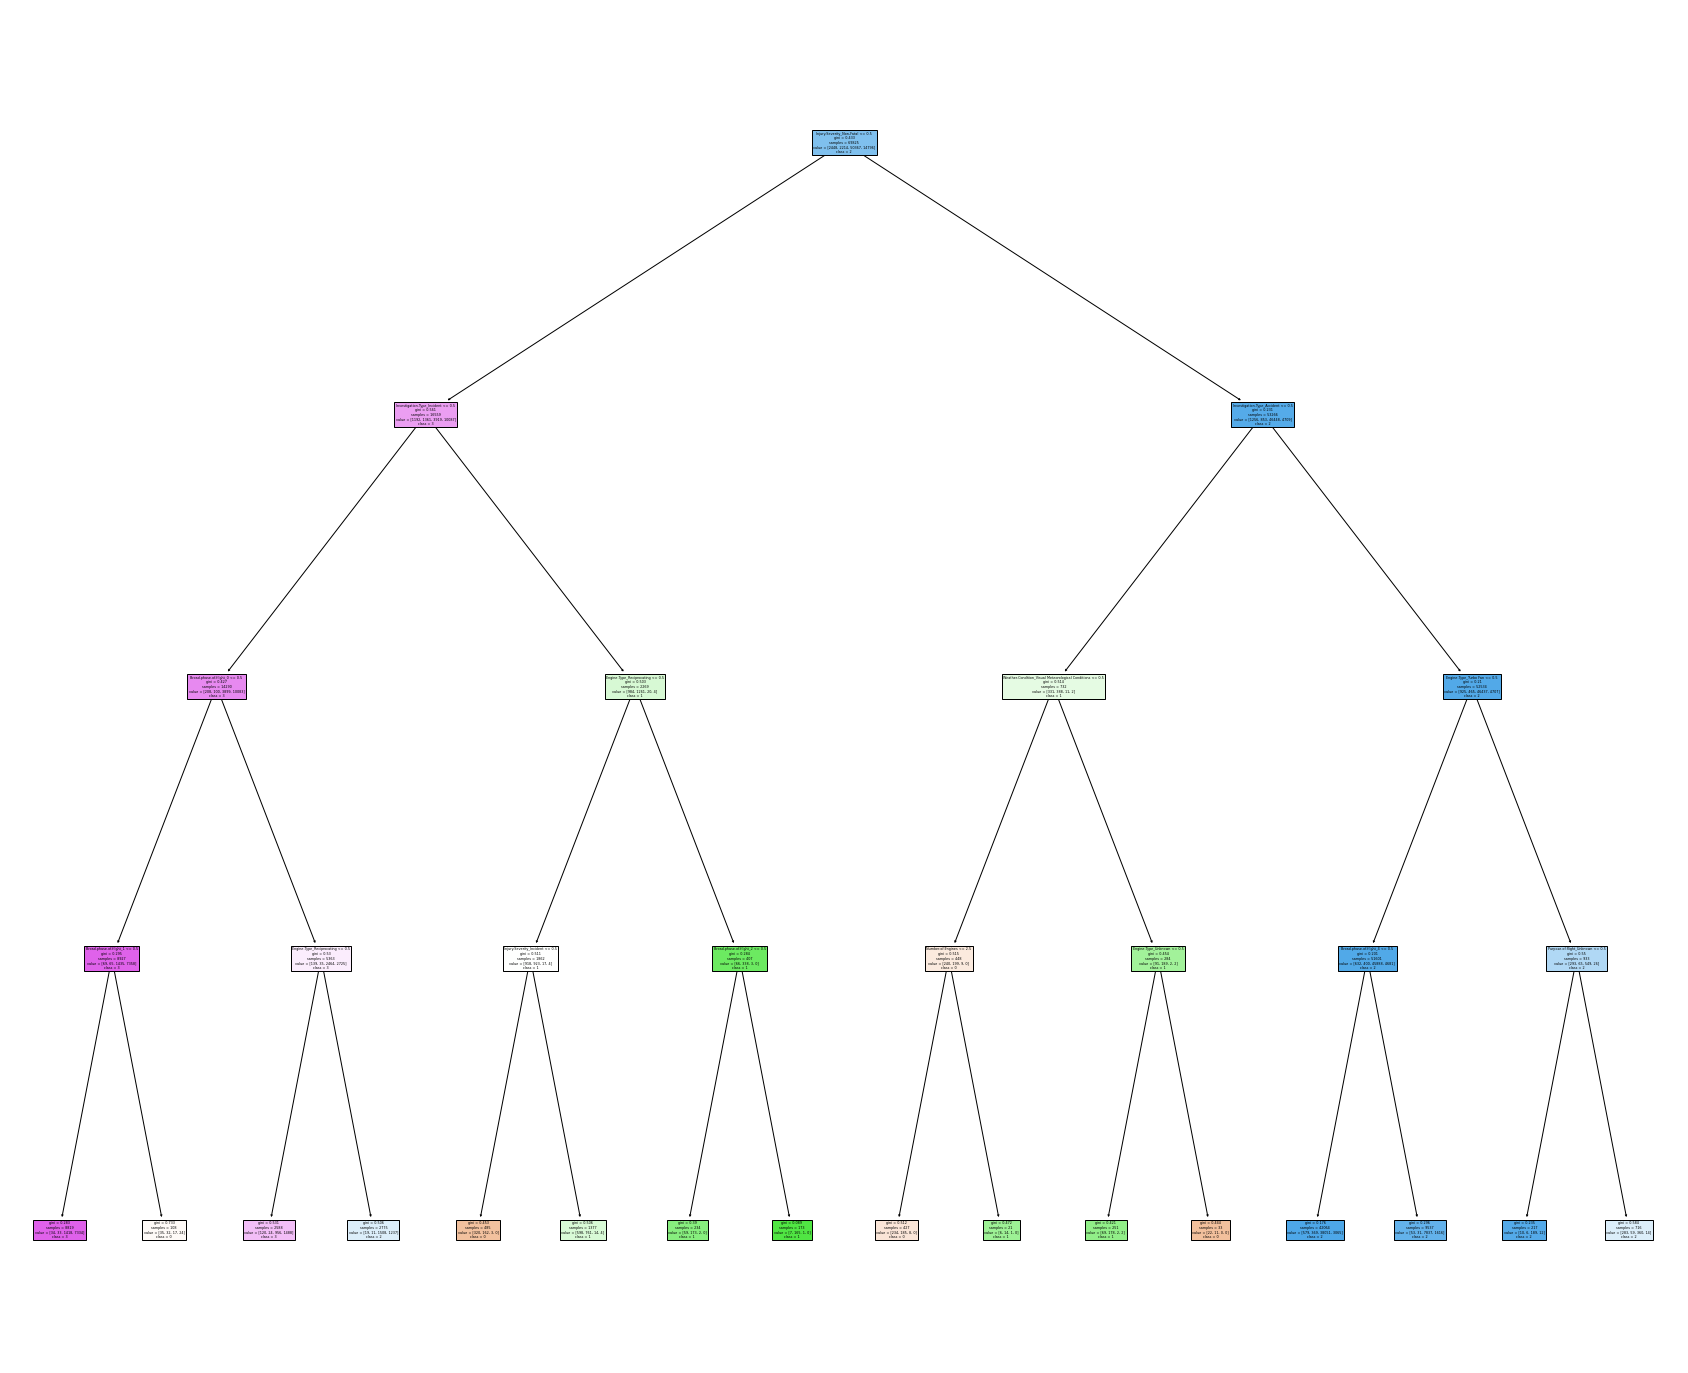

In [ ]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (30,25))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["0","1","2","3"])

We will now predict the **train data** using the model we have trained just now. The **heatmap of confusion matrix** is plotted following the format below.

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

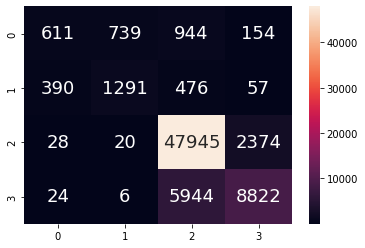

In [ ]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.8402291442892946

True positive rate of class 0 train data:	 0.24959150326797386
False negative rate of class 0 train data:	 0.7504084967320261

True positive rate of class 1 train data:	 0.583107497741644
False negative rate of class 1 train data:	 0.4168925022583559

True positive rate of class 2 train data:	 0.9519129588818075
False negative rate of class 2 train data:	 0.04808704111819247

True positive rate of class 3 train data:	 0.596242227629089
False negative rate of class 3 train data:	 0.40375777237091104


We will now predict the **test data** using the model we have trained just now. The **heatmap of confusion matrix** is plotted following the format below.

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

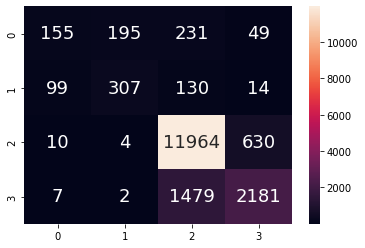

In [ ]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Test Data")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_Test = confusion_matrix(y_test, y_test_pred)
true0 = cm_Test[0][0]
true1 = cm_Test[1][1]
true2 = cm_Test[2][2]
true3 = cm_Test[3][3]
false0 = cm_Test[0][1] + cm_Test[0][2] + cm_Test[0][3]
false1 = cm_Test[1][0] + cm_Test[1][2] + cm_Test[1][3]
false2 = cm_Test[2][0] + cm_Test[2][1] + cm_Test[2][3]
false3 = cm_Test[3][0] + cm_Test[3][1] + cm_Test[3][2]

print("True positive rate of class 0 Test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Test data:\t",(false3/(true3+false3)))

Test Data
Accuracy:	 0.8367417081972848

True positive rate of class 0 Test data:	 0.24603174603174602
False negative rate of class 0 Test data:	 0.753968253968254

True positive rate of class 1 Test data:	 0.5581818181818182
False negative rate of class 1 Test data:	 0.44181818181818183

True positive rate of class 2 Test data:	 0.9489213197969543
False negative rate of class 2 Test data:	 0.051078680203045686

True positive rate of class 3 Test data:	 0.5944399018806215
False negative rate of class 3 Test data:	 0.4055600981193786


Notice that we have an extremely high accuracy in `Aircraft damage` class 2. However, we must also notice that for other classes (class 0, 1 and 3), the accuracy is relatively lower in both train and test data. 

Although the overall accuracy is reaching a high value of 0.84, the machine learning accuracy is biased towards class 2 data only. Hence, more fine-tunning is required for a better model of machine learning.  

### Resample of data 

**Imbalance Data**

A classification data set with skewed class proportions is called **imbalanced**. Classes that make up a large proportion of the data set are called **majority classes**. Those that make up a smaller proportion are **minority classes**.

What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

| Degree of Imbalance | Proportion of Minority Class |
| :------------------ | ----------------------------:|
| Mild                | 20-40% of the data set       |
| Moderate            | 1-20% of the data set        |
| Extreme             | <1% of the data set          |

More details at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

Since `Aircraft Damage`, we should look at the distribution of **Aircraft damage** by plotting a categorical plot. 

2    62975
3    18465
0     3078
1     2764
Name: Aircraft.damage, dtype: int64

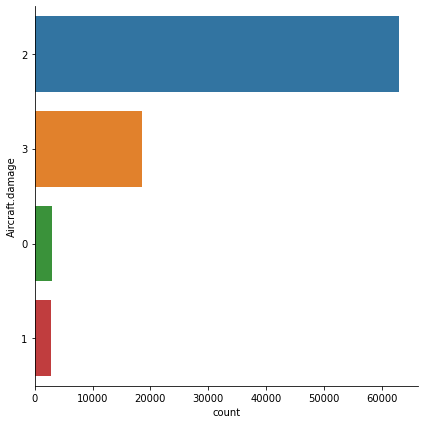

In [ ]:
sb.catplot(y = "Aircraft.damage" , data = avi_acc2_ohe, kind = "count", height = 6, 
           order = avi_acc2_ohe["Aircraft.damage"].value_counts().index)
avi_acc2_ohe["Aircraft.damage"].value_counts()

From the calculation below, we can tell that our data for aviation accident has **mild degree of imbalance**. 

In [ ]:
minority_sum = (avi_acc2_ohe["Aircraft.damage"]!=2).sum()
print("Proportion of Minority Class:\t", round((minority_sum/len(avi_acc2_ohe)*100),2),"%")

Proportion of Minority Class:	 27.85 %


**Resample - Upsampling**

The model resamples arrays or sparse matrices in a consistent way. Here, we use it to upsample our sizes of ```Aircraft Damage``` level 3 and 4 to the size of level 2. By applying this step, we solve the issue of the biased data. However, it might affect our prediction accuracy. We will solve the new issue in a later part.\
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

Note that we are using the ```scikit-learn.utils``` ```resample``` instead of the ```resample``` from ```pandas``` library, which mainly works on time-series data.

Import the essential library.

In [ ]:
from sklearn.utils import resample

We will now upsampling the class size of level 0, 1 and 3 of aircraft damage to the class size of level 2 of aircraft damage. 

In [ ]:
damage0 = avi_acc2_ohe[avi_acc2_ohe["Aircraft.damage"] == 0]
damage1 = avi_acc2_ohe[avi_acc2_ohe["Aircraft.damage"] == 1]
damage2 = avi_acc2_ohe[avi_acc2_ohe["Aircraft.damage"] == 2]
damage3 = avi_acc2_ohe[avi_acc2_ohe["Aircraft.damage"] == 3]

re_damage0 = resample(damage0, replace = True, n_samples = damage2.shape[0])
re_damage1 = resample(damage1, replace = True, n_samples = damage2.shape[0])
re_damage3 = resample(damage3, replace = True, n_samples = damage2.shape[0])

We can now see all classes of **Aircraft Damage** are having the same number now. The sample now is much more balanced, which can be illutrated by the categorical plot below.  

In [ ]:
re_avi_acc2_ohe = pd.concat([damage2, re_damage0, re_damage1, re_damage3])
re_avi_acc2_ohe["Aircraft.damage"].value_counts()

0    62975
1    62975
2    62975
3    62975
Name: Aircraft.damage, dtype: int64

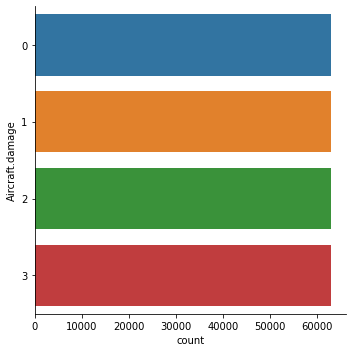

In [ ]:
sb.catplot(y = "Aircraft.damage", data = re_avi_acc2_ohe, kind = "count")

### DecisionTreeClassifier (Upsampling data)

We will now be using the resampled data to perform **classification** process again using `DecisionTreeClassifier`. The data we are using are shown below. 

In [ ]:
re_avi_acc2_ohe

,Number.of.Engines,Number of plane involved,Investigation.Type_Accident,Investigation.Type_Incident,Injury.Severity_Fatal,Injury.Severity_Incident,Injury.Severity_Non-Fatal,Injury.Severity_Unavailable,Amateur.Built_No,Amateur.Built_Unknown,...,Purpose.of.flight_Unknown,Weather.Condition_Instrument Meterological Conditions,Weather.Condition_Unknown,Weather.Condition_Visual Meteorological Conditions,Broad.phase.of.flight_0,Broad.phase.of.flight_1,Broad.phase.of.flight_2,Broad.phase.of.flight_3,Broad.phase.of.flight_4,Aircraft.damage
5,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
7,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
8,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
9,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
10,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17880,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3
38849,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
35426,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
41324,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3


In [ ]:
y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #split the data into train:test=8:2

[Text(0.5, 0.9, 'Investigation.Type_Incident <= 0.5\ngini = 0.75\nsamples = 201520\nvalue = [50554, 50320, 50196, 50450]\nclass = 0'),
 Text(0.25, 0.7, 'Injury.Severity_Fatal <= 0.5\ngini = 0.693\nsamples = 137229\nvalue = [23478, 13151, 50161, 50439]\nclass = 3'),
 Text(0.125, 0.5, 'Engine.Type_Reciprocating <= 0.5\ngini = 0.665\nsamples = 93739\nvalue = [19875, 11118, 46496, 16250]\nclass = 2'),
 Text(0.0625, 0.3, 'Engine.Type_Turbo Shaft <= 0.5\ngini = 0.633\nsamples = 32614\nvalue = [17501, 5683, 6615, 2815]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.593\nsamples = 29335\nvalue = [17124, 5554, 4758, 1899]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.586\nsamples = 3279\nvalue = [377, 129, 1857, 916]\nclass = 2'),
 Text(0.1875, 0.3, 'Number of plane involved <= 1.5\ngini = 0.517\nsamples = 61125\nvalue = [2374, 5435, 39881, 13435]\nclass = 2'),
 Text(0.15625, 0.1, 'gini = 0.465\nsamples = 57016\nvalue = [2198, 2111, 39401, 13306]\nclass = 2'),
 Text(0.21875, 0.1, 'gini = 0.329\nsamp

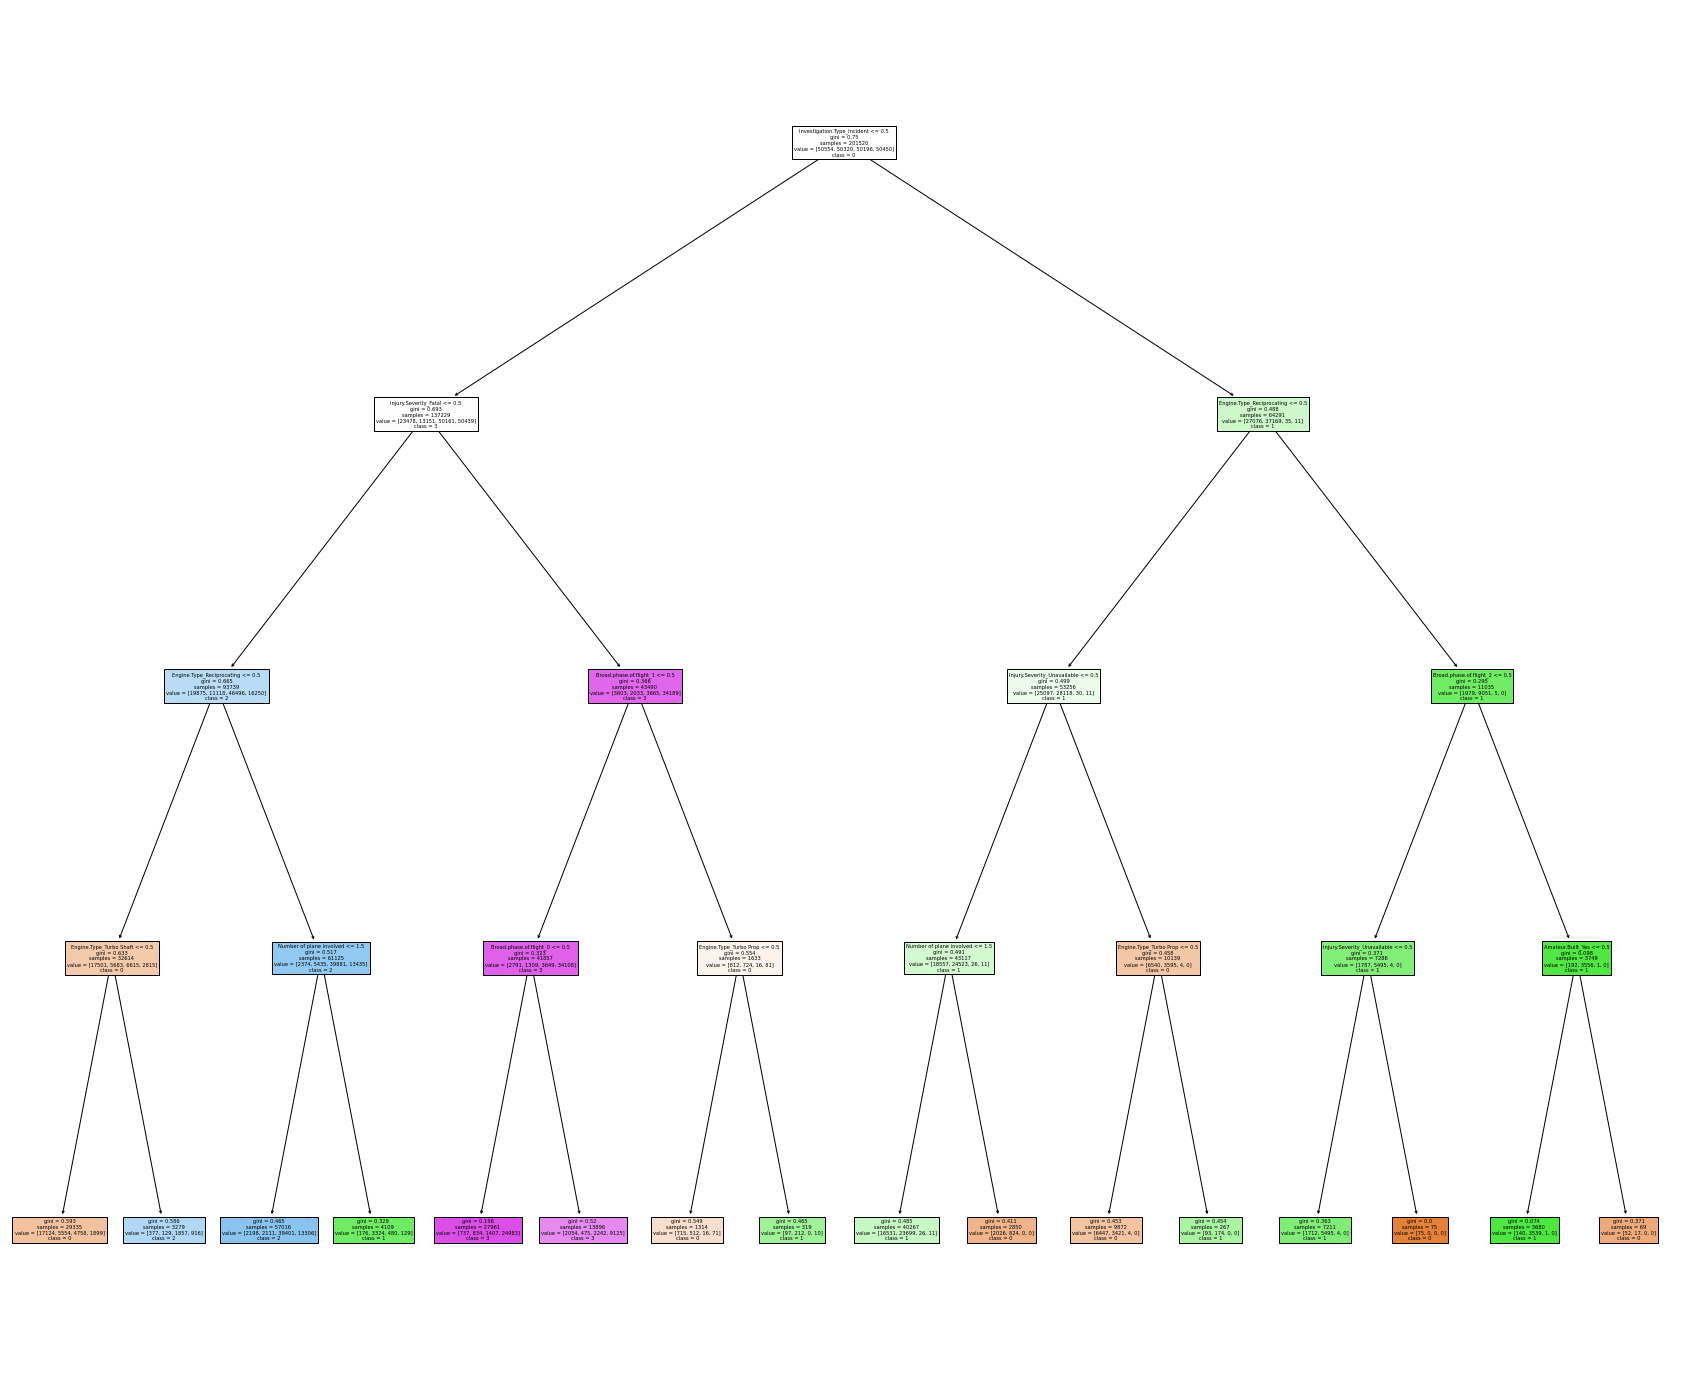

In [ ]:
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (30,25))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["0","1","2","3"])

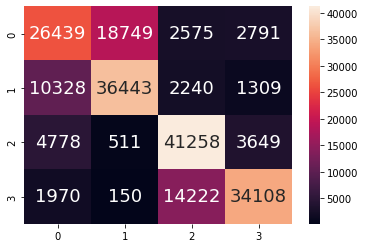

In [ ]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.6860262008733624

True positive rate of class 0 train data:	 0.5229853226253115
False negative rate of class 0 train data:	 0.47701467737468844

True positive rate of class 1 train data:	 0.724224960254372
False negative rate of class 1 train data:	 0.275775039745628

True positive rate of class 2 train data:	 0.8219380030281297
False negative rate of class 2 train data:	 0.17806199697187028

True positive rate of class 3 train data:	 0.6760753221010902
False negative rate of class 3 train data:	 0.32392467789890983


We will now look at the **Test data**.

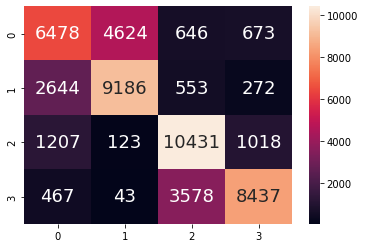

In [ ]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("TestData")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_test= confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 Testdata:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Testdata:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Testdata:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Testdata:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Testdata:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Testdata:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Testdata:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Testdata:\t",(false3/(true3+false3)))

TestData
Accuracy:	 0.6854307264787615

True positive rate of class 0 Testdata:	 0.5215361082038483
False negative rate of class 0 Testdata:	 0.4784638917961517

True positive rate of class 1 Testdata:	 0.7258790991702885
False negative rate of class 1 Testdata:	 0.2741209008297116

True positive rate of class 2 Testdata:	 0.8162610532905548
False negative rate of class 2 Testdata:	 0.18373894670944518

True positive rate of class 3 Testdata:	 0.6736127744510978
False negative rate of class 3 Testdata:	 0.3263872255489022


Notice that there is a decrease in the overall accuracy in both test data and train data as compared to before upsampling. However, it is good to see that the data is no longer biased to one single class of `Aircraft Damage`. 

We can see that the true postive rate (TPR) in each class are generally improving. Therefore, we will now improve the overall accuracy of the trained model.

### Cross-validation (CV Grid Search for DecisionTreeClassifier) 

As the depth of the decision tree previously plotted are by random guesses of ours, this might contribute to a reduction of accuracy in our machine learning model. Hence, to improve the accuracy, we will now carry out cross-validation on DecisionTreeClassifier to determine the **optimum depth** of our decision tree. 

In other words, we will now carry out **Cross-validation** for the fine-tunning of the **hyperparameter** of our decision tree.

*A basic intro to cross-validation*

The model performs exhaustive search over specified parameter values for an estimator. Important members are fit, predict.
More details at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

---

What is **cross-validation**?\
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.\
More details at: https://www.mygreatlearning.com/blog/cross-validation/

In [ ]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Now, we will build a model of GridSearchCV model, with DecisionTreeClassifier as the base model. We should also include the hyperparameter of our base model, which is `max_depth` (from 2 to 10) for fine-tunning. 

We will be doing a 10-fold cross validation and set **accuracy** as the startegy to evaluate the performance. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': np.arange(2,10)}

svrGrid = GridSearchCV(DecisionTreeClassifier(),
                      param_grid, cv = 10,
                      scoring = 'accuracy')
svrGrid.fit(x_train, y_train["Aircraft.damage"].ravel())

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

From cross validation, we will now obtain the best choice for the hyperparameter and the score for the best model.

In [ ]:
print(svrGrid.best_estimator_)
print(svrGrid.best_score_)

DecisionTreeClassifier(max_depth=9)
0.7129069075029774


As we know that if we keep on increasing the depth of the decision tree, there will actually an increase in the accuracy of the base model. However, the processing time of the data should be our concern as well. As the max_depth of the decision tree increases, the time taken for processing may increase as well. Hence, we decided to take the **max_depth = 9**. 

### DecisionTreeClassifier (best model from GridSearchCV)

By refering to the hyperparameter fine-tunninng that has been done above by using **Cross Validation**, we will now set the max_depth of the decision tree to be 9

[Text(0.4532291666666667, 0.95, 'Investigation.Type_Accident <= 0.5\ngini = 0.75\nsamples = 201520\nvalue = [50329, 50454, 50253, 50484]\nclass = 3'),
 Text(0.18366666666666667, 0.85, 'Engine.Type_Reciprocating <= 0.5\ngini = 0.488\nsamples = 64314\nvalue = [26924, 37348, 31, 11]\nclass = 1'),
 Text(0.1285, 0.75, 'Injury.Severity_Unavailable <= 0.5\ngini = 0.499\nsamples = 53289\nvalue = [24952, 28300, 27, 10]\nclass = 1'),
 Text(0.089, 0.65, 'Number of plane involved <= 1.5\ngini = 0.49\nsamples = 43174\nvalue = [18452, 24688, 24, 10]\nclass = 1'),
 Text(0.054, 0.55, 'Weather.Condition_Unknown <= 0.5\ngini = 0.484\nsamples = 40357\nvalue = [16426, 23897, 24, 10]\nclass = 1'),
 Text(0.03266666666666666, 0.45, 'Broad.phase.of.flight_4 <= 0.5\ngini = 0.459\nsamples = 27272\nvalue = [9692, 17565, 7, 8]\nclass = 1'),
 Text(0.02, 0.35, 'Number.of.Engines <= 2.5\ngini = 0.444\nsamples = 23331\nvalue = [7715, 15601, 7, 8]\nclass = 1'),
 Text(0.010666666666666666, 0.25, 'Broad.phase.of.flight_

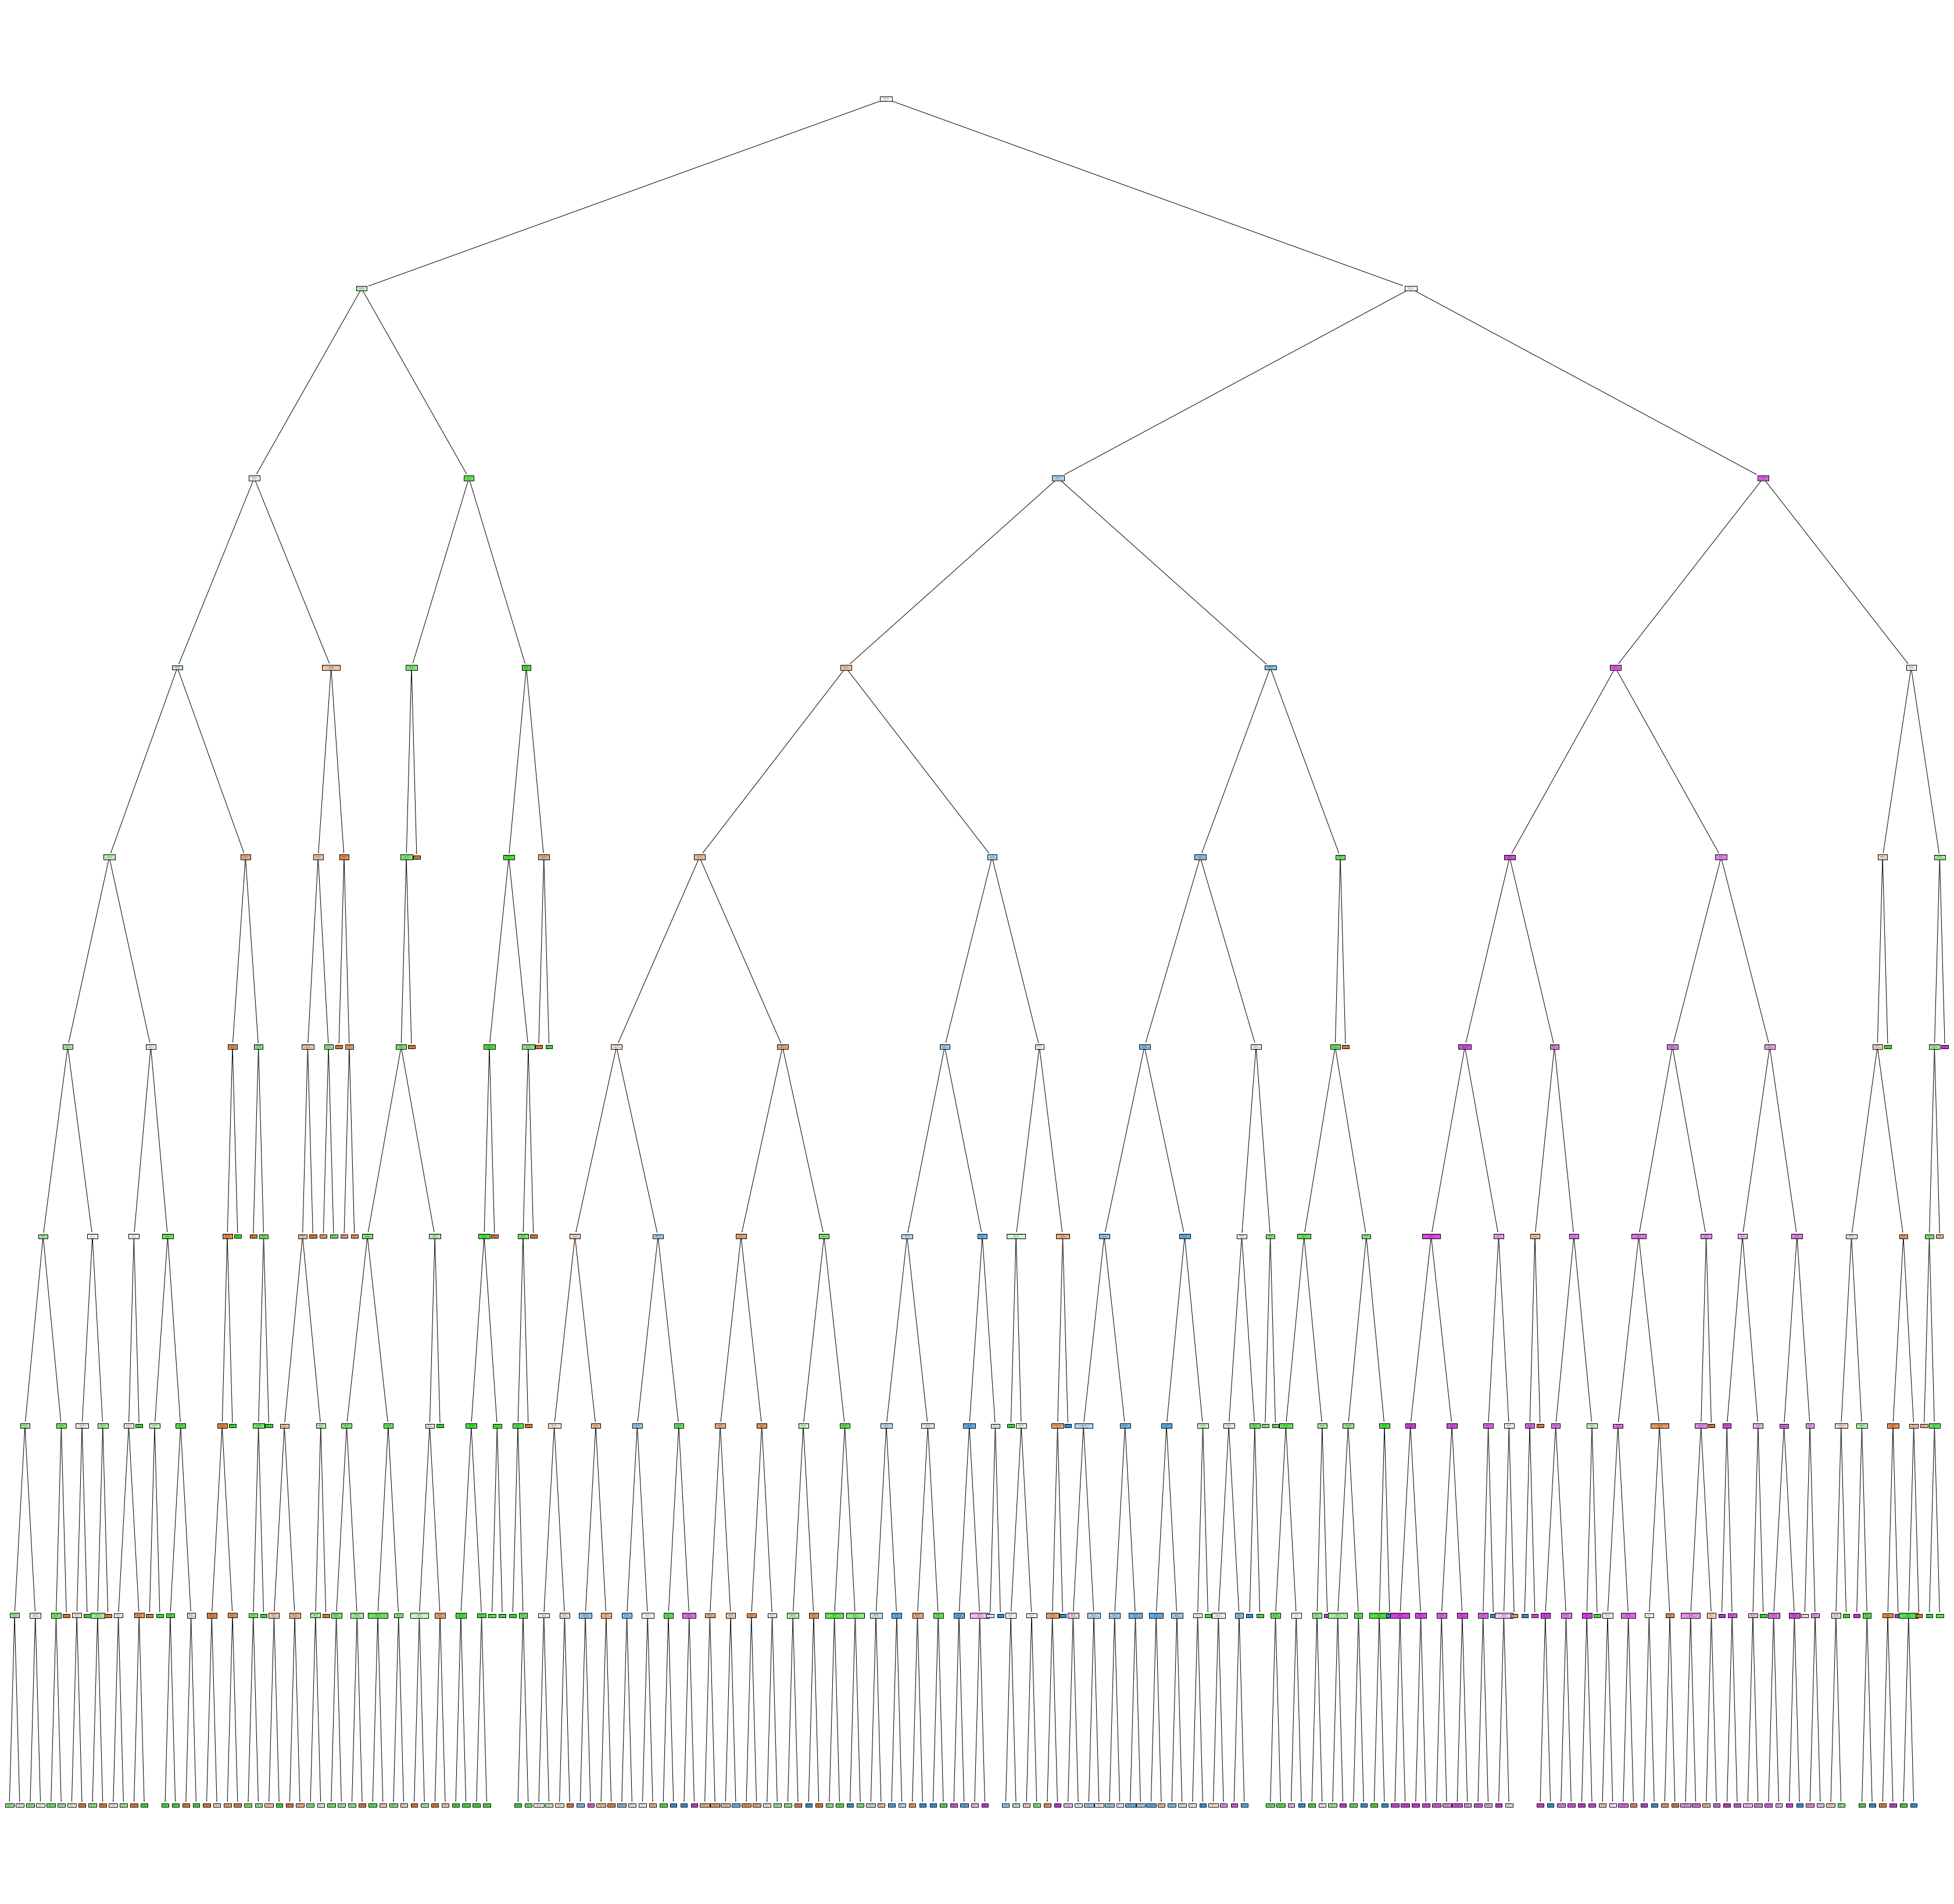

In [ ]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 9)
dectree.fit(x_train, y_train)

f = plt.figure(figsize = (60,60))
plot_tree(dectree, filled=True, feature_names = x_train.columns, class_names = ["0","1","2","3"])


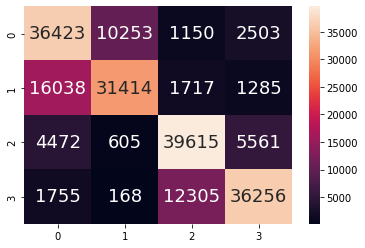

In [ ]:
y_train_pred = dectree.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Train Data")
print("Accuracy:\t", dectree.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.7131202858277094

True positive rate of class 0 train data:	 0.723698066720976
False negative rate of class 0 train data:	 0.276301933279024

True positive rate of class 1 train data:	 0.6226265509176676
False negative rate of class 1 train data:	 0.37737344908233245

True positive rate of class 2 train data:	 0.7883111456032476
False negative rate of class 2 train data:	 0.21168885439675245

True positive rate of class 3 train data:	 0.7181681324776167
False negative rate of class 3 train data:	 0.2818318675223833


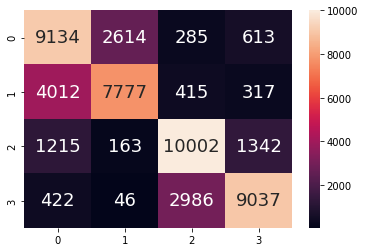

In [ ]:
y_test_pred = dectree.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("TestData")
print("Accuracy:\t", dectree.score(x_test, y_test))
print()
cm_test= confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 Testdata:\t", (true0/(true0+false0)))
print("False negative rate of class 0 Testdata:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 Testdata:\t", (true1/(true1+false1)))
print("False negative rate of class 1 Testdata:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 Testdata:\t", (true2/(true2+false2)))
print("False negative rate of class 2 Testdata:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 Testdata:\t", (true3/(true3+false3)))
print("False negative rate of class 3 Testdata:\t",(false3/(true3+false3)))

TestData
Accuracy:	 0.7135768161969035

True positive rate of class 0 Testdata:	 0.7222837260793927
False negative rate of class 0 Testdata:	 0.2777162739206073

True positive rate of class 1 Testdata:	 0.621116524239278
False negative rate of class 1 Testdata:	 0.378883475760722

True positive rate of class 2 Testdata:	 0.7861971388146518
False negative rate of class 2 Testdata:	 0.21380286118534822

True positive rate of class 3 Testdata:	 0.7234809062525018
False negative rate of class 3 Testdata:	 0.2765190937474982


We can now see that there is an improvement in the overall accuracy in both the test and train data. The model is also not biased to any one of the classes. We could conclude that our machine is well trained now and can predict the responding variable `Aircraft damage` well.

### RandomForestClassifier (Upsampling data)

Time for something which is beyond the syllabus of MA0218. We decided to have a new machine learning predicting our responding variable `Aircraft damage` using a new base model named **RandomForestClassifier**. 

*A brief introduction about RandomForestClassifier*

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In previous model, we are only having one decision tree and for now we will be having more decision tree, forming a forest.

More details at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Import the essential library 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

By random guesses, we will set the base model to be having the following hyperparameter:
- n_estimators: 100 
- max_depth: 4 (being the maximum depth of each of the decision tree)

In [ ]:
rfc  = RandomForestClassifier(n_estimators = 100, max_depth = 4)

rfc.fit(x_train, y_train["Aircraft.damage"].ravel())

RandomForestClassifier(max_depth=4)

Same as DecisionTreeClassifier, we will now predict the **Train data** using the base model. The heatmap of confusion matrix is plotted following the format below:

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

Train Data
Accuracy:	 0.713110361254466

True positive rate of class 0 train data:	 0.7232846339628618
False negative rate of class 0 train data:	 0.2767153660371382

True positive rate of class 1 train data:	 0.6216710390333094
False negative rate of class 1 train data:	 0.3783289609666905

True positive rate of class 2 train data:	 0.7886864507916302
False negative rate of class 2 train data:	 0.2113135492083698

True positive rate of class 3 train data:	 0.7188082675447296
False negative rate of class 3 train data:	 0.28119173245527035


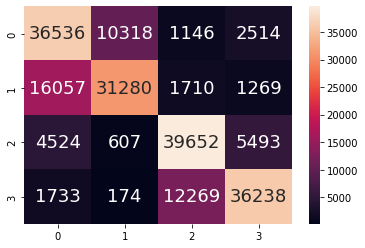

In [ ]:
y_train_pred = rfc.predict(x_train)

sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("Train Data")
print("Accuracy:\t", rfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Same as DecisionTreeClassifier, we will now predict the **Test data** using the base model. The heatmap of confusion matrix is plotted following the format below:

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 |  

test Data
Accuracy:	 0.713616514489877

True positive rate of class 0 test data:	 0.7239386887087713
False negative rate of class 0 test data:	 0.27606131129122863

True positive rate of class 1 test data:	 0.6249308792163678
False negative rate of class 1 test data:	 0.3750691207836322

True positive rate of class 2 test data:	 0.7847074572801008
False negative rate of class 2 test data:	 0.2152925427198992

True positive rate of class 3 test data:	 0.720882095374572
False negative rate of class 3 test data:	 0.2791179046254279


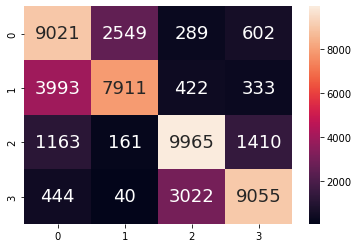

In [ ]:
y_test_pred = rfc.predict(x_test)

sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("test Data")
print("Accuracy:\t", rfc.score(x_test, y_test))
print()
cm_test = confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

The model we built using `RandomForestClassifier` is much more accurate as compared to the model we built usign `DecisionTreeClassifier` (the one that we have before undergoing cross-validation). 

As compared to the model we built using `DecisionTreeClassifier` (the one we have after undergoing cross-validation), the accuracy found is almost the same. Hence, to further improve accuracy in `RandomForestClassifier`, we will carry out **CrossValidation** to further fine tune our hyperparameter, which are the number of trees in forest and the maximum depth of each decisionn tree.

### Cross-validation (CV Grid Search for RandomForestClassifier) 

In [ ]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

Now, we will build a model of GridSearchCV model, with DecisionTreeClassifier as the base model. We should also include the hyperparameter of our base model, which are:
- `n_estimators` : from 100 to 500 with step = 100.
- `max_depth`: from 4 to 10

We will be doing a 5-fold cross validation and set **accuracy** as the startegy to evaluate the performance. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': np.arange(100, 501, 100), 'max_depth': np.arange(4,10)}

svrGrid = GridSearchCV(RandomForestClassifier(),
                      param_grid, cv = 5,
                      scoring = 'accuracy')
svrGrid.fit(x_train, y_train["Aircraft.damage"].ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='accuracy')

In [ ]:
print(svrGrid.best_estimator_)
print(svrGrid.best_score_)

RandomForestClassifier(max_depth=9, n_estimators=300)
0.7104803493449782


### RandomForestClassifier (best model from GridSearchCV)

By refering to the hyperparameter fine-tunninng that has been done above by using **Cross Validation**, we will now set:
- n_estimators: 300
- max_depth: 9

In [ ]:
x = pd.DataFrame(re_avi_acc2_ohe.drop("Aircraft.damage", axis = 1))
y = pd.DataFrame(re_avi_acc2_ohe["Aircraft.damage"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rfc  = RandomForestClassifier(n_estimators = 300, max_depth = 9)
rfc.fit(x_train, y_train["Aircraft.damage"].ravel())

RandomForestClassifier(max_depth=9, n_estimators=300)

Train Data
Accuracy:	 0.7133386264390631

True positive rate of class 0 train data:	 0.7242008770015278
False negative rate of class 0 train data:	 0.2757991229984722

True positive rate of class 1 train data:	 0.6209252895254366
False negative rate of class 1 train data:	 0.3790747104745635

True positive rate of class 2 train data:	 0.789243264659271
False negative rate of class 2 train data:	 0.210756735340729

True positive rate of class 3 train data:	 0.7187673956262426
False negative rate of class 3 train data:	 0.28123260437375747


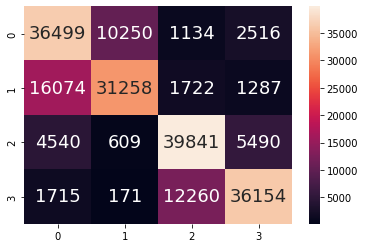

In [ ]:
y_train_pred = rfc.predict(x_train)


sb.heatmap(confusion_matrix(y_train, y_train_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("Train Data")
print("Accuracy:\t", rfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

test Data
Accuracy:	 0.7127034537514887

True positive rate of class 0 test data:	 0.7202608142493638
False negative rate of class 0 test data:	 0.2797391857506361

True positive rate of class 1 test data:	 0.6279088174766503
False negative rate of class 1 test data:	 0.3720911825233497

True positive rate of class 2 test data:	 0.7823929571828732
False negative rate of class 2 test data:	 0.21760704281712684

True positive rate of class 3 test data:	 0.721025641025641
False negative rate of class 3 test data:	 0.27897435897435896


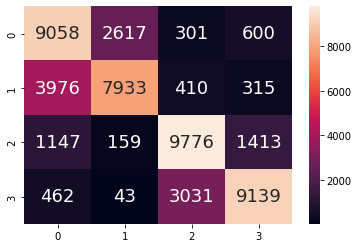

In [ ]:
y_test_pred = rfc.predict(x_test)


sb.heatmap(confusion_matrix(y_test, y_test_pred),
          annot = True, fmt = ".0f", annot_kws = {"size": 18})

print("test Data")
print("Accuracy:\t", rfc.score(x_test, y_test))
print()
cm_test = confusion_matrix(y_test, y_test_pred)
true0 = cm_test[0][0]
true1 = cm_test[1][1]
true2 = cm_test[2][2]
true3 = cm_test[3][3]
false0 = cm_test[0][1] + cm_test[0][2] + cm_test[0][3]
false1 = cm_test[1][0] + cm_test[1][2] + cm_test[1][3]
false2 = cm_test[2][0] + cm_test[2][1] + cm_test[2][3]
false3 = cm_test[3][0] + cm_test[3][1] + cm_test[3][2]

print("True positive rate of class 0 test data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 test data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 test data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 test data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 test data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 test data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 test data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 test data:\t",(false3/(true3+false3)))

As we can see even after carrying out fine-tunning on the hyper parameter of `RandomForestClassifier` by using **cross validation**, the accuracy does not improve significantly. Hence, we decided to carry out another model named `BalancedRandomForestClassifier`.

### BalancedRandomForestClassifier

In this machine learning model, we will not use the oversampled data. Instead, we will be using the model `BalancedRandomForestClassifier` from *imblearn* library. 

More details about *imblearn lirbrary*:
https://imbalanced-learn.org/stable/

**Concept of ensemble**

```Ensemble``` learning gives credence to the idea of the **“wisdom of crowds”**, which suggests that the decision-making of a larger group of people is typically better than that of an individual expert. Similarly, ```ensemble``` learning refers to a group (or ```ensemble```) of base learners, or models, which work collectively to achieve a better final prediction. A single model, also known as a *base or weak learner*, may not perform well individually due to *high variance or high bias*. However, when weak learners are aggregated, they can form a strong learner, as their combination *reduces bias or variance, yielding better model performance*.

More about ensemble learning: 

https://bdtechtalks.com/2020/11/12/what-is-ensemble-learning/

We will start off by using the dataset that the categorical variables that are encoded. 

In [ ]:
avi_acc2_ohe.head()

,Number.of.Engines,Number of plane involved,Investigation.Type_Accident,Investigation.Type_Incident,Injury.Severity_Fatal,Injury.Severity_Incident,Injury.Severity_Non-Fatal,Injury.Severity_Unavailable,Amateur.Built_No,Amateur.Built_Unknown,...,Purpose.of.flight_Unknown,Weather.Condition_Instrument Meterological Conditions,Weather.Condition_Unknown,Weather.Condition_Visual Meteorological Conditions,Broad.phase.of.flight_0,Broad.phase.of.flight_1,Broad.phase.of.flight_2,Broad.phase.of.flight_3,Broad.phase.of.flight_4,Aircraft.damage
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3


In [ ]:
avi_acc2_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Number.of.Engines                                      87282 non-null  float32 
 1   Number of plane involved                               87282 non-null  float32 
 2   Investigation.Type_Accident                            87282 non-null  float64 
 3   Investigation.Type_Incident                            87282 non-null  float64 
 4   Injury.Severity_Fatal                                  87282 non-null  float64 
 5   Injury.Severity_Incident                               87282 non-null  float64 
 6   Injury.Severity_Non-Fatal                              87282 non-null  float64 
 7   Injury.Severity_Unavailable                            87282 non-null  float64 
 8   Amateur.Built_No                    

We will now start with the machine learning model `BalancedRandomForestClassifier`. A **BalanceRandomForestClassifier** will under-sample each bootstrao sample to balance it. 
More info about `BalancedRandomForestClassifier`: https://imbalanced-learn.org/stable/references/generated/imblearn.ensemble.BalancedRandomForestClassifier.html

Import the essential library. 

In [ ]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 7.6 MB/s 
     |████████████████████████████████| 199 kB 62.5 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
y = pd.DataFrame(avi_acc2_ohe["Aircraft.damage"])
x = pd.DataFrame(avi_acc2_ohe.drop("Aircraft.damage", axis = 1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

We will now build a BalacedRandomForestClassifier by using the parameters stated below: 
- n_estimators: 100
- criterion: gini (as our concern is to build a machine learning for classification)
- max_depth: None (Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
- sampling_strategy: auto
- random_state: None (the random number generator is the RandomState instance used by np.random.)

In [ ]:
brfc = BalancedRandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = None, 
                                     sampling_strategy = "auto", random_state = None)
brfc.fit(x_train, y_train["Aircraft.damage"].ravel())

BalancedRandomForestClassifier()

We will now predict the **train data** using `BalancedRandomForestClassifier`. The heatmap will be plotted using the format below. 

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 | 

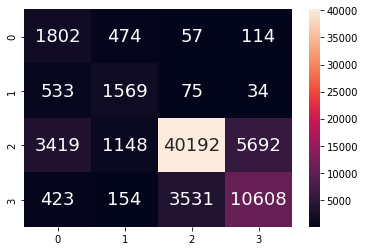

In [ ]:
y_train_pred = brfc.predict(x_train)
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Train Data")
print("Accuracy:\t", brfc.score(x_train, y_train))
print()
cm_Train = confusion_matrix(y_train, y_train_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Train Data
Accuracy:	 0.7656856426781239

True positive rate of class 0 train data:	 0.7364119329791582
False negative rate of class 0 train data:	 0.26358806702084187

True positive rate of class 1 train data:	 0.7096336499321574
False negative rate of class 1 train data:	 0.2903663500678426

True positive rate of class 2 train data:	 0.7966541793026898
False negative rate of class 2 train data:	 0.20334582069731025

True positive rate of class 3 train data:	 0.7208480565371025
False negative rate of class 3 train data:	 0.2791519434628975


We will now predict the **test data** using `BalancedRandomForestClassifier`. The heatmap will be plotted using the format below. 

| Confusion Matrix  |       |        |        |        |      
| :---              | :---: | :----: | :----: | :----: |         
| Actual 0   |  True 0   |  False 0  |   False 0   |   False 0   |             
| Actual 1   |  False 1  |  True 1   |   False 1   |   False 1   |  
| Actual 2   |  False 2  |  False 2  |   True 2    |   False 2   |  
| Actual 3   |  False 3  |  False 3  |   False 3    |   True 3   |    
|                   | Predicted 0 | Predicted 1 | Predicted 2 | Predicted 3 | 

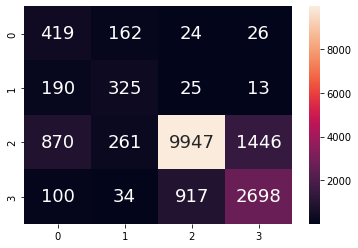

In [ ]:
y_test_pred = brfc.predict(x_test)
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt = ".0f", annot_kws = {"size": 18})

In [ ]:
print("Test Data")
print("Accuracy:\t", brfc.score(x_test, y_test))
print()
cm_Test = confusion_matrix(y_test, y_test_pred)
true0 = cm_Train[0][0]
true1 = cm_Train[1][1]
true2 = cm_Train[2][2]
true3 = cm_Train[3][3]
false0 = cm_Train[0][1] + cm_Train[0][2] + cm_Train[0][3]
false1 = cm_Train[1][0] + cm_Train[1][2] + cm_Train[1][3]
false2 = cm_Train[2][0] + cm_Train[2][1] + cm_Train[2][3]
false3 = cm_Train[3][0] + cm_Train[3][1] + cm_Train[3][2]

print("True positive rate of class 0 train data:\t", (true0/(true0+false0)))
print("False negative rate of class 0 train data:\t",(false0/(true0+false0)))
print()
print("True positive rate of class 1 train data:\t", (true1/(true1+false1)))
print("False negative rate of class 1 train data:\t",(false1/(true1+false1)))
print()
print("True positive rate of class 2 train data:\t", (true2/(true2+false2)))
print("False negative rate of class 2 train data:\t",(false2/(true2+false2)))
print()
print("True positive rate of class 3 train data:\t", (true3/(true3+false3)))
print("False negative rate of class 3 train data:\t",(false3/(true3+false3)))

Test Data
Accuracy:	 0.7648507761929312

True positive rate of class 0 train data:	 0.7364119329791582
False negative rate of class 0 train data:	 0.26358806702084187

True positive rate of class 1 train data:	 0.7096336499321574
False negative rate of class 1 train data:	 0.2903663500678426

True positive rate of class 2 train data:	 0.7966541793026898
False negative rate of class 2 train data:	 0.20334582069731025

True positive rate of class 3 train data:	 0.7208480565371025
False negative rate of class 3 train data:	 0.2791519434628975


We can see that the overall accuracy of the `BalancedRandomForestClassifier` is much more higher than the upsample `RandomForestClassifier` even with cross validation to fine tune the hyperparamter of the model. 

Also, `BalancedRandomForestClassifier` has a much lesser runtime as compared to `RandomForestClassifier` as cross validation process has taken up lots of time. 